**Domain:** Digital Public Infrastructure


**Goal:** Credit Card Usage Analysis
- Analyzing the Usage of digital payments and transactions made by credit cards issued by various banks from january 2025 to may 2025


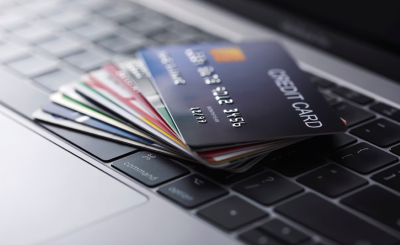


**Skill:** EDA
* EDA is the process of data understanding on Validated data
* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts, 
    - Stats
        - Descriptive
    - Visual Analysis

### TOC <a id='menu'>

* [0. Data](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
   * [2.1 Uni-Variate Analysis](#uni)
    * [2.2 Bi-Variate Analysis](#bi)
    * [2.3 Multi-variate Analyis](#multi)
* [3. Conclusion](#conclusion)

**Importing Python Modules**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0. Data <a id='dc'>

[Back to TOC](#menu)

- For this analysis we need data about credit card payments volume and the value of the transactions made through various payment methods of various banks and bank sectors
- Data collected from RBI website

__Data Source__ https://rbi.org.in/scripts/ATMView.aspx

__loading the data from CSV file__

In [19]:
df = pd.read_csv("DPI.csv")

In [21]:
df

Bank Sector Type                        Bank Name    Month  \
0    Public Sector Banks                   BANK OF BARODA  January   
1    Public Sector Banks                    BANK OF INDIA  January   
2    Public Sector Banks              BANK OF MAHARASHTRA  January   
3    Public Sector Banks                      CANARA BANK  January   
4    Public Sector Banks            CENTRAL BANK OF INDIA  January   
..                   ...                              ...      ...   
315  Small Finance Banks  SHIVALIK SMALL FINANCE BANK LTD      May   
316  Small Finance Banks  SURYODAY SMALL FINANCE BANK LTD      May   
317  Small Finance Banks   UJJIVAN SMALL FINANCE BANK LTD      May   
318  Small Finance Banks     UNITY SMALL FINANCE BANK LTD      May   
319  Small Finance Banks   UTKARSH SMALL FINANCE BANK LTD      May   

     No Of ATMs  No Of PoS  No of Credit Cards  CC PT at PoS Volume  \
0         55527      48728             2936005              6834186   
1         30570      18267               72345               136483   
2          6109       1368               31206                44145   
3         25148      78258              998100              1074161   
4          6723       3324                   0                    0   
..          ...        ...                 ...                  ...   
315           0          0                   0                    0   
316          67          0                1207                  320   
317         613          0                   0                    0   
318         192          0                2042                  680   
319        1140          0              127276                10548   

     Cc PT at PoS value ( in CR)  CC PT Online (e-com) Volume  \
0                    1364.780271                      3209685   
1                      54.738607                        47299   
2                      20.486347                        18261   
3                     424.465137                       473533   
4                       0.000000                            0   
..                           ...                          ...   
315                     0.000000                            0   
316                     0.082554                         2072   
317                     0.000000                            0   
318                     0.519816                         1185   
319                     1.369387                        44410   

     CC PT Online (e-com) Value (In CR)  CC PT Others Volume  \
0                           1721.556673                    0   
1                             20.008079                    0   
2                             10.229049                    0   
3                            283.058508                    0   
4                              0.000000                    0   
..                                  ...                  ...   
315                            0.000000                    0   
316                            0.206290                    0   
317                            0.000000                    0   
318                            1.252521                    0   
319                            4.043244              1033321   

     CC PT Others Value (in Cr)  CC W at ATM Volume  \
0                        0.0000               12589   
1                        0.0000                5436   
2                        0.0000                 775   
3                        0.0000               99144   
4                        0.0000                   0   
..                          ...                 ...   
315                      0.0000                   0   
316                      0.0000                   0   
317                      0.0000                   0   
318                      0.0000                   0   
319                     18.6231                 348   

     CC W at ATM value ( in CR)  
0                      6.351031  
1                      2.916337  
2

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Bank Sector Type                    320 non-null    object 
 1   Bank Name                           320 non-null    object 
 2   Month                               320 non-null    object 
 3   No Of ATMs                          320 non-null    int64  
 4   No Of PoS                           320 non-null    int64  
 5   No of Credit Cards                  320 non-null    int64  
 6   CC PT at PoS Volume                 320 non-null    int64  
 7   Cc PT at PoS value ( in CR)         320 non-null    float64
 8   CC PT Online (e-com) Volume         320 non-null    int64  
 9   CC PT Online (e-com) Value (In CR)  320 non-null    float64
 10  CC PT Others Volume                 320 non-null    int64  
 11  CC PT Others Value (in Cr)          320 non-n

__3. Columns Description__

* __Total No Of Columns : 14__
* __Total No Of Rows : 320__
* __Total No Of Null Values : 0__
* __Total No Of Bank Sectors : 5__
* __Total No Of Banks : 64__

In [17]:
df.columns

Index(['Bank Sector Type', 'Bank Name', 'Month', 'No Of ATMs', 'No Of PoS',
       'No of Credit Cards', 'CC PT at PoS Volume',
       'Cc PT at PoS value ( in CR)', 'CC PT Online (e-com) Volume',
       'CC PT Online (e-com) Value (In CR)', 'CC PT Others Volume',
       'CC PT Others Value (in Cr)', 'CC W at ATM Volume',
       'CC W at ATM value ( in CR)'],
      dtype='object')

Column|Description
----|------
__Bank Sector Type__|Bank sector Whether its belongs to 'Public Sector Banks', 'Private Sector Banks', 'Foreign Banks','Payment Banks', 'Small Finance Banks'
__Bank Name__|Name Of The Bank
__No Of ATMs__|Total Number of ATMs and CRMs(Cash Recycler Machines) that Bank have (includes Total number of ATMs & CRMs deployed on-site, off-site and Micro ATMs by the bank)
__No Of PoS__ | Total number of PoS terminals deployed by the bank
__No of Credit Cards__|Total number of credit cards issued outstanding (after adjusting the number of cards withdrawan/cancelled)

Column|__Full Form__|__Descrption__
----|------|-----
__CC PT at PoS Volume__| Credit Card Payments Transactions at PoS Volume |Total number of financial transactions done by the credit card issued by the bank at PoS terminals
__Cc PT at PoS value__|Credit Card Payments Transactions at PoS value ( in CR) |Total value of financial transactions done by the credit card issued by the bank at PoS terminals
__CC PT Online (e-com) Volume__|Credit Card Payments Transactions Online (e-com) Volume |Total number of financial transactions done by the credit card issued by the bank at online and e-commerce sites
__CC PT Online (e-com) Value__|Credit Card Payments Transactions Online (e-com) Value (In CR) |Total value of financial transactions done by the credit card issued by the bank at online and e-commerce sites
__CC PT Others Volume__| Credit Card Payments Transactions Others Volume| Total number of other financial transactions done by the credit card issued by the bank (example: Mail-Order and Tele-Order transactions)
__CC PT Others Value__| Credit Card Payments Transactions Others Value | Total value of other financial transactions done by the credit card issued by the bank
__CC W at ATM Volume__|Credit Card Withdrawal at ATM Volume |Total number of cash withdrawal transactions done by the credit card issued by the bank at ATMs
__CC W at ATM value__|Credit Card Withdrawal at ATM value ( in CR)|Total value of cash withdrawal transactions done by the crebit card issued by the bank at ATMs







* __CRM__ : A Cash Recycler Machine is an advanced ATM that not only allows cash withdrawals but also supports:
> Cash deposits
| Recycling deposited cash for future withdrawals
| Card-based and card-less transactions
| Mini-statements, balance inquiries, and bill payments (in some cases)

* __On-site Deployment__ : The ATM/CRM is located within or attached to a bank branch
* __Off- site Deployment__ : The ATM/CRM is located away from any bank branch
* __PoS__ : Point of Sale (PoS) terminal is an electronic device used by merchants (shops, petrol bunks, restaurants, etc.)

* __Bank Sector Types__ : 'Public Sector Banks', 'Private Sector Banks', 'Foreign Banks','Payment Banks', 'Small Finance Banks'
* __Bank Names__ : 'BANK OF BARODA', 'BANK OF INDIA', 'BANK OF MAHARASHTRA',
       'CANARA BANK', 'CENTRAL BANK OF INDIA', 'INDIAN BANK',
       'INDIAN OVERSEAS BANK', 'PUNJAB AND SIND BANK',
       'PUNJAB NATIONAL BANK', 'STATE BANK OF INDIA', 'UCO BANK',
       'UNION BANK OF INDIA', 'AXIS BANK LTD', 'BANDHAN BANK LTD',
       'CITY UNION BANK LTD.', 'CSB BANK LTD.', 'DCB BANK LTD',
       'DHANALAXMI BANK LTD', 'FEDERAL BANK LTD', 'HDFC BANK LTD',
       'ICICI BANK LTD', 'IDBI BANK LTD', 'IDFC FIRST BANK LTD',
       'INDUSIND BANK LTD', 'JAMMU AND KASHMIR BANK LTD',
       'KARNATAKA BANK LTD', 'KARUR VYSYA BANK LTD',
       'KOTAK MAHINDRA BANK LTD', 'NAINITAL BANK LTD', 'RBL BANK LTD',
       'SOUTH INDIAN BANK', 'TAMILNAD MERCANTILE BANK LTD',
       'YES BANK LTD', 'AMERICAN EXPRESS BANKING CORPORATION',
       'BANK OF AMERICA', 'BANK OF BAHRAIN & KUWAIT B.S.C.',
       'BARCLAYS BANK PLC', 'CITI BANK', 'DBS INDIA BANK LTD',
       'DEUTSCHE BANK LTD', 'DOHA BANK Q.P.S.C.', 'HSBC LTD',
       'KEB HANA BANK', 'KOOKMIN BANK', 'SBM BANK INDIA LTD',
       'STANDARD CHARTERED BANK LTD', 'WOORI BANK',
       'AIRTEL PAYMENTS BANK', 'FINO PAYMENTS BANK',
       'INDIA POST PAYMENTS BANK', 'JIO PAYMENTS BANK ',
       'NSDL PAYMENTS BANK', 'PAYTM PAYMENTS BANK',
       'AU SMALL FINANCE BANK LTD', 'CAPITAL SMALL FINANCE BANK LTD',
       'EQUITAS SMALL FINANCE BANK LTD', 'ESAF SMALL FINANCE BANK LTD',
       'JANA SMALL FINANCE BANK LTD', 'NORTH EAST SMALL FINANCE BANK LTD',
       'SHIVALIK SMALL FINANCE BANK LTD',
       'SURYODAY SMALL FINANCE BANK LTD',
       'UJJIVAN SMALL FINANCE BANK LTD', 'UNITY SMALL FINANCE BANK LTD',
       'UTKARSH SMALL FINANCE BANK LTD', 'SLICE SMALL FINANCE BANK LTD'

__Other Datasets__

In [40]:
d ={}
df1 = pd.DataFrame(d)
df1["Bank Sector Type"] = df["Bank Sector Type"]
df1["Bank Name"] = df["Bank Name"]
df1["Month"] = df["Month"] 

In [42]:
df1["Total_Credit_card_transactions_volume"] = df['CC PT at PoS Volume']+df['CC PT Online (e-com) Volume']+df['CC PT Others Volume']+df['CC W at ATM Volume']

In [44]:
df1["Total_Credit_card_transactions_value"] = df['Cc PT at PoS value ( in CR)']+df['CC PT Online (e-com) Value (In CR)']+df['CC PT Others Value (in Cr)']+df['CC W at ATM value ( in CR)']

In [46]:
df1.head()

Bank Sector Type              Bank Name    Month  \
0  Public Sector Banks         BANK OF BARODA  January   
1  Public Sector Banks          BANK OF INDIA  January   
2  Public Sector Banks    BANK OF MAHARASHTRA  January   
3  Public Sector Banks            CANARA BANK  January   
4  Public Sector Banks  CENTRAL BANK OF INDIA  January   

   Total_Credit_card_transactions_volume  Total_Credit_card_transactions_value  
0                               10056460                           3092.687975  
1                                 189218                             77.663023  
2                                  63181                             31.086306  
3                                1646838                            763.554885  
4                                      0                              0.000000

In [48]:
df_may = df[df["Month"] == "May"] 
df_may.head() 

Bank Sector Type              Bank Name Month  No Of ATMs  No Of PoS  \
256  Public Sector Banks         BANK OF BARODA   May       55583      52013   
257  Public Sector Banks          BANK OF INDIA   May       31320      18508   
258  Public Sector Banks    BANK OF MAHARASHTRA   May        8042        105   
259  Public Sector Banks            CANARA BANK   May       21920      77302   
260  Public Sector Banks  CENTRAL BANK OF INDIA   May        6772       3333   

     No of Credit Cards  CC PT at PoS Volume  Cc PT at PoS value ( in CR)  \
256             3017591              7562173                  1446.871486   
257               72891               195619                    81.208438   
258               26535                42893                    20.144312   
259              981365              1048387                   414.411911   
260                   0                    0                     0.000000   

     CC PT Online (e-com) Volume  CC PT Online (e-com) Value (In CR)  \
256                      3292432                         1703.810606   
257                        67403                           31.956749   
258                        18093                            9.696094   
259                       463395                          280.143698   
260                            0                            0.000000   

     CC PT Others Volume  CC PT Others Value (in Cr)  CC W at ATM Volume  \
256                    0                         0.0                9161   
257                    0                         0.0                8106   
258                    0                         0.0                 688   
259                    0                         0.0               83384   
260                    0                         0.0                   0   

     CC W at ATM value ( in CR)  
256                    4.763770  
257                    4.344063  
258                    0.352900  
259                   47.987480  
260                    0.000000

### 1. Data Validation <a id='dv'>

[Back to TOC](#menu)

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

In [55]:
# Taking Copy of raw data for validation: so that raw data can be preserved

raw = df.copy()

In [57]:
raw.index

RangeIndex(start=0, stop=320, step=1)

In [59]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Bank Sector Type                    320 non-null    object 
 1   Bank Name                           320 non-null    object 
 2   Month                               320 non-null    object 
 3   No Of ATMs                          320 non-null    int64  
 4   No Of PoS                           320 non-null    int64  
 5   No of Credit Cards                  320 non-null    int64  
 6   CC PT at PoS Volume                 320 non-null    int64  
 7   Cc PT at PoS value ( in CR)         320 non-null    float64
 8   CC PT Online (e-com) Volume         320 non-null    int64  
 9   CC PT Online (e-com) Value (In CR)  320 non-null    float64
 10  CC PT Others Volume                 320 non-null    int64  
 11  CC PT Others Value (in Cr)          320 non-n

In [326]:
df.isnull().sum()

Bank Sector Type                      0
Bank Name                             0
Month                                 0
No Of ATMs                            0
No Of PoS                             0
No of Credit Cards                    0
CC PT at PoS Volume                   0
Cc PT at PoS value ( in CR)           0
CC PT Online (e-com) Volume           0
CC PT Online (e-com) Value (In CR)    0
CC PT Others Volume                   0
CC PT Others Value (in Cr)            0
CC W at ATM Volume                    0
CC W at ATM value ( in CR)            0
dtype: int64

In [61]:
# Writing a python function with df methods to validate column data
def colvalidate(df, col):
    print(f"Column: {col}")
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values:")
    if df[col].nunique()>=100:
        for indx in range(0, df[col].nunique(), 100):
            print(df[col].unique()[indx:indx+100])
            print()
    else:
        print(df[col].unique())
        print()
    print("Data Type of Column:", df[col].dtype)
    print()   

Applying above function to dataframe columns

In [64]:
df.columns

Index(['Bank Sector Type', 'Bank Name', 'Month', 'No Of ATMs', 'No Of PoS',
       'No of Credit Cards', 'CC PT at PoS Volume',
       'Cc PT at PoS value ( in CR)', 'CC PT Online (e-com) Volume',
       'CC PT Online (e-com) Value (In CR)', 'CC PT Others Volume',
       'CC PT Others Value (in Cr)', 'CC W at ATM Volume',
       'CC W at ATM value ( in CR)'],
      dtype='object')

__Bank Sector Type__

In [67]:
colvalidate(raw, 'Bank Sector Type')

Column: Bank Sector Type

Number of Unique Values in Column: 5

Unique Values:
['Public Sector Banks' 'Private Sector Banks' 'Foreign Banks'
 'Payment Banks' 'Small Finance Banks']

Data Type of Column: object



__Bank Name__

In [71]:
colvalidate(raw, 'Bank Name')

Column: Bank Name

Number of Unique Values in Column: 65

Unique Values:
['BANK OF BARODA' 'BANK OF INDIA' 'BANK OF MAHARASHTRA' 'CANARA BANK'
 'CENTRAL BANK OF INDIA' 'INDIAN BANK' 'INDIAN OVERSEAS BANK'
 'PUNJAB AND SIND BANK' 'PUNJAB NATIONAL BANK' 'STATE BANK OF INDIA'
 'UCO BANK' 'UNION BANK OF INDIA' 'AXIS BANK LTD' 'BANDHAN BANK LTD'
 'CITY UNION BANK LTD.' 'CSB BANK LTD.' 'DCB BANK LTD'
 'DHANALAXMI BANK LTD' 'FEDERAL BANK LTD' 'HDFC BANK LTD' 'ICICI BANK LTD'
 'IDBI BANK LTD' 'IDFC FIRST BANK LTD' 'INDUSIND BANK LTD'
 'JAMMU AND KASHMIR BANK LTD' 'KARNATAKA BANK LTD' 'KARUR VYSYA BANK LTD'
 'KOTAK MAHINDRA BANK LTD' 'NAINITAL BANK LTD' 'RBL BANK LTD'
 'SOUTH INDIAN BANK' 'TAMILNAD MERCANTILE BANK LTD' 'YES BANK LTD'
 'AMERICAN EXPRESS BANKING CORPORATION' 'BANK OF AMERICA'
 'BANK OF BAHRAIN & KUWAIT B.S.C.' 'BARCLAYS BANK PLC' 'CITI BANK'
 'DBS INDIA BANK LTD' 'DEUTSCHE BANK LTD' 'DOHA BANK Q.P.S.C.' 'HSBC LTD'
 'KEB HANA BANK' 'KOOKMIN BANK' 'SBM BANK INDIA LTD'
 'STANDARD CH

__Month__

In [73]:
colvalidate(raw, 'Month')

Column: Month

Number of Unique Values in Column: 5

Unique Values:
['January' 'February' 'March' 'April' 'May']

Data Type of Column: object



__No Of ATMs__

In [76]:
colvalidate(raw, 'No Of ATMs')

Column: No Of ATMs

Number of Unique Values in Column: 213

Unique Values:
[ 55527  30570   6109  25148   6723  18876  13235   2727  12004 112053
   6048  16133  14897    438  96904    784    430    280   2058  23312
  22465   4417   8714   3171   2520   1509   2218   3330      0    412
   1281   1155  92654    865     15      2     72      1    146 144294
 448059 192695 306927   1523    187    707   4855    183     17     67
    612    188   1088  55429  30573   6630  18518   6811  19324  13355
   2730  11986 111421   6073  17033  14834  99826    786    432   2066
  23323  22563   4431   8812   3025   2522   1512   2232    413   1151
  88747    851    145 146099 450464 193768 301823   1525    190    711
   5041    234     16    613    185   1093  56231  31058   7354  18963]

[  6688  19935  13630   2751  11822 111972   6065  16988  14306 101775
    791    435   2079  23470  22663   4484   8583   3027   2612   1516
   2252   3295   1280  86271     71    143 148211 452778 193051 307247


__No Of PoS__

In [79]:
colvalidate(raw, 'No Of PoS')

Column: No Of PoS

Number of Unique Values in Column: 164

Unique Values:
[  48728   18267    1368   78258    3324   20924       0     941   34151
 1511604   10865   49385 2017258   66939    7300    8059    1506   21342
 1722629 1878122   13417   43977  247114   14422   10689    2365   81801
 2288788   13877    2339  100561   28937     645    2828   49505   18313
    1350   80033    3396   20927     957   34346 1564278   10860   49471
 2087090   67479    7294    8087    1497   21661 1749089 1984472   13359
   43292  247579   14471   10707    2245   82866 2398158   13851    2338
  102990   21973     643    2937   52652   18352    1313   74699    3234
   19814     979   34626 1606175   10695   49219 2184882   68198    7286
    8107    1531   22150 1781856 2041482   13022   42019  245826   14474
   10747    1721   83617 2560285   13954    2362  104026   15109     658
    2981]

[  51874   18476      68   76084    3289   19845    1004   28580 1610352
   10693   48642 2221316   68621    730

__No of Credit Cards__

In [82]:
colvalidate(raw, 'No of Credit Cards')

Column: No of Credit Cards

Number of Unique Values in Column: 196

Unique Values:
[ 2936005    72345    31206   998100        0   282701    67280   584549
 20481479   512281 14782101    26657   156506       44    13047  1120269
 23444799 18084209    41970  3388080  3152176   127230    10820  4995388
  4973507   382768    33049  2410672  1453258   227866   494552   843281
   711778   904392  1023332       65       47       29   105346  2937597
    71607    31161   998341   283032    70815   593014 20664097   502376
 14770420    43667   158784       82    13140  1144347 23623081 18110863
    43109  3481252  3180830   127547    10582  4959362  4863716   380565
    32117  2426078  1466843   231603   487414   862260   717344   886426
  1016630      174      491       22   124567  3043116    72760    27869
   962773   283126    72673   604213 20823857   495099 14899543      806
    48395   159526      138    13215  1182437 23840913 18208662    42311
  3552853  3163585   128113    10493]

[ 

__CC PT at PoS Volume__

In [112]:
 colvalidate(raw, 'CC PT at PoS Volume')

Column: CC PT at PoS Volume

Number of Unique Values in Column: 195

Unique Values:
[ 6834186   136483    44145  1074161        0   222614    73644   353392
 26503243   576063 35083926    49464   265362       65    26977  2619996
 78092723 18792992    76292 10892095  4129599   194241    25095 11474319
  5297057   606428    43330  8845532  1630809   138724   500563   991835
   208077   994813   939945      210       43        7     4867  6458882
   150474    40120   961491   192728    69435   323379 23578315   584409
 32556409    46272   230141      153    23177  2418195 72523728 16614698
    68666 10392983  3738932   187626    20998 10065808  4663734   533403
    36731  8638868  1500834   155155   441480   927267   178031   840443
   825973      821      148        2     5684  7331814   179338    43827
  1084539   211129    75110   362689 26615137   497466 38147678      685
    47758   259831      296    26339  2791408 83870678 18810434    78171
 12217512  4277591   191485    22758]

[

__Cc PT at PoS value ( in CR)__

In [93]:
 colvalidate(raw, 'Cc PT at PoS value ( in CR)')

Column: Cc PT at PoS value ( in CR)

Number of Unique Values in Column: 196

Unique Values:
[1.36478027e+03 5.47386067e+01 2.04863474e+01 4.24465137e+02
 0.00000000e+00 9.82200729e+01 2.34237660e+01 1.57563650e+02
 1.11736986e+04 2.46959543e+02 8.92557955e+03 2.23096827e+01
 7.74733435e+01 1.56204800e-02 6.39161447e+00 7.31208753e+02
 1.78288408e+04 1.08253073e+04 3.37907145e+01 1.95712803e+03
 4.72072407e+03 1.67828749e+02 1.72405349e+01 2.72433077e+03
 2.87348190e+03 2.34256870e+02 1.98805704e+01 1.72657396e+03
 1.42003749e+03 8.11043740e+01 2.30028321e+02 3.67359823e+02
 3.34437123e+01 3.71587239e+02 4.68407275e+02 3.12859110e-02
 1.07673830e-02 6.21200000e-04 6.94476825e-01 1.27074906e+03
 6.48161296e+01 1.87065130e+01 3.85738751e+02 8.55592749e+01
 2.26156301e+01 1.48487025e+02 1.02921897e+04 2.53137673e+02
 8.57843065e+03 2.04868058e+01 7.03850955e+01 2.97804000e-02
 5.53306009e+00 6.42075937e+02 1.63860583e+04 9.32524150e+03
 3.04738897e+01 1.81422793e+03 3.09019070e+03 1.598202

__CC PT Online (e-com) Volume__

In [96]:
 colvalidate(raw, 'CC PT Online (e-com) Volume')

Column: CC PT Online (e-com) Volume

Number of Unique Values in Column: 195

Unique Values:
[ 3209685    47299    18261   473533        0   273579    24221   258518
 47427768  1607571 26179236    20673  1547422       26     6788  1729890
 35653914 61348884    60292  2387102  8295251   103391     7406  4364672
  5397321   654776    16948  1129148  4259815   268020   286202  1635903
   402866  1123993  1945253      151      312       78    27824  3015086
    53263    17908   436721   260412    24501   253868 44881635  1747699
 23814131    20879  1475081       90     6250  1525000 32036201 56577680
    56034  2223742  8056227    95451     7849  3948740  4896392   586692
    16653  1036941  3897427   281755   265787  1554773   352928   979653
  1853626      348     1005       39    26348  3350020    64587    19575
   491612   302073    27544   312515 53287190  1581624 28095443      518
    22657  1702024      184     7682  1788789 37020937 65086576    59430
  2547385  9344211   104753     

In [98]:
colvalidate(raw, 'CC PT Online (e-com) Value (In CR)')

Column: CC PT Online (e-com) Value (In CR)

Number of Unique Values in Column: 195

Unique Values:
[1.72155667e+03 2.00080793e+01 1.02290490e+01 2.83058508e+02
 0.00000000e+00 1.32966870e+02 9.36795053e+00 1.56720715e+02
 1.78029833e+04 3.21991492e+02 1.12865916e+04 2.33924795e+01
 1.63180457e+02 6.16324000e-03 2.98717359e+00 9.64111535e+02
 3.28352007e+04 2.48563022e+04 2.72142057e+01 1.68325005e+03
 4.16846792e+03 4.24308336e+01 1.12959192e+01 4.30708418e+03
 4.45305554e+03 4.13470625e+02 1.07139441e+01 1.40852663e+03
 4.05514705e+03 4.68837870e+02 2.48165999e+02 1.56553213e+03
 9.03441201e+01 6.08562665e+02 5.29807729e+02 4.54390180e-02
 2.86712590e-02 3.60370700e-03 2.43468397e+00 1.60098354e+03
 2.43301076e+01 9.01605686e+00 2.62406151e+02 1.19767371e+02
 9.70184699e+00 1.49243611e+02 1.58833148e+04 3.33662898e+02
 1.03058401e+04 2.09724355e+01 1.53671696e+02 2.46671760e-02
 2.76036318e+00 8.45555264e+02 2.99921297e+04 2.16656218e+04
 2.45903243e+01 1.52938664e+03 5.79090789e+03 3

__CC PT Others Volume__

In [101]:
 colvalidate(raw, 'CC PT Others Volume')

Column: CC PT Others Volume

Number of Unique Values in Column: 19

Unique Values:
[      0       2      54     401  634619      43     355  678284       3
      58     343  818501       1      33     183  854223      41     309
 1033321]

Data Type of Column: int64



__CC PT Others Value (in Cr)__

In [104]:
 colvalidate(raw, 'CC PT Others Value (in Cr)')

Column: CC PT Others Value (in Cr)

Number of Unique Values in Column: 21

Unique Values:
[0.00000e+00 1.19000e-02 4.30600e-01 1.83000e-02 1.12254e+01 4.29000e-01
 1.64000e-02 1.18253e+01 1.08000e-02 4.49400e-01 1.57000e-02 1.46661e+01
 9.40000e-03 9.00000e-04 2.00800e-01 8.20000e-03 1.54672e+01 1.02000e-02
 3.05400e-01 1.45000e-02 1.86231e+01]

Data Type of Column: float64



__CC W at ATM Volume__

In [107]:
 colvalidate(raw, 'CC W at ATM Volume')

Column: CC W at ATM Volume

Number of Unique Values in Column: 165

Unique Values:
[ 12589   5436    775  99144      0   4389   2609   6805 140771   9606
  74401    212      1    280   5984 190569  65501    546  25299  25055
  11861    412  26180  33433   1974  15886    468   2795   2973   7155
   2103   3712      5    223  11171   6930    708  86998   4225   2746
   5414 126765   9628  65041    201      3    270   5232 164818  56838
    547  23242  22578  10600    396  21465  28667   1903  11594    508
   2228   2782   6032   1821   2840     14    250  10931   8366    827
  93939   4472   2967   5931 143519   8536  74490    215      2    279
   5466 176283  61577    431  24975  25107  11676    496  22794  29116
   2102  11191    497   2168   3185   6491   1856   3025      8    273]

[  9177   8096    704  82299   4177   2692   5781 135795   8982  68276
    183   5522 165288  58963    535  23187  23615  10509    465  21053
  26350   1893  10537    484   1930   3180   1682   1700   2809

__CC W at ATM value ( in CR)__

In [110]:
 colvalidate(raw, 'CC W at ATM value ( in CR)')

Column: CC W at ATM value ( in CR)

Number of Unique Values in Column: 173

Unique Values:
[6.35103120e+00 2.91633673e+00 3.70910000e-01 5.60312400e+01
 0.00000000e+00 3.39129330e+00 1.31413789e+00 2.14901000e+00
 5.87473419e+01 4.13155942e+00 3.76147700e+01 1.23740000e-01
 1.50000000e-04 9.98100000e-02 2.82982130e+00 1.24285994e+02
 3.33133632e+01 3.35640000e-01 1.22669600e+01 1.35233908e+01
 5.14489701e+00 3.20000000e-01 1.31024248e+01 1.46918872e+01
 7.88565468e-01 8.25776000e+00 3.82490000e-01 8.17580000e-01
 2.10700663e+00 3.49067406e+00 1.45111813e+00 2.01756000e+00
 1.85000000e-03 1.00000000e-05 1.98500000e-02 5.78694000e+00
 3.61876405e+00 3.43700000e-01 4.96194200e+01 3.27701410e+00
 1.40120000e+00 1.74797000e+00 5.40417988e+01 4.17036968e+00
 3.36853200e+01 9.18800000e-02 1.70000000e-03 9.95100000e-02
 2.60137000e+00 1.11071218e+02 2.96223556e+01 3.29650000e-01
 1.15272800e+01 1.24344133e+01 4.68498570e+00 3.23570000e-01
 1.09141653e+01 1.28084685e+01 7.64529580e-01 5.7784600

* All Columns data is valid and belongs to respected columns
* Data Type of columns also proper

**Duplicated rows Check & Handling**

In [116]:
# In data we have cat cols, converting them to lower case first

for col in df.columns:
    if df[col].dtype==object:
        df[col] = df[col].str.lower()

In [118]:
df.head()

Bank Sector Type              Bank Name    Month  No Of ATMs  No Of PoS  \
0  public sector banks         bank of baroda  january       55527      48728   
1  public sector banks          bank of india  january       30570      18267   
2  public sector banks    bank of maharashtra  january        6109       1368   
3  public sector banks            canara bank  january       25148      78258   
4  public sector banks  central bank of india  january        6723       3324   

   No of Credit Cards  CC PT at PoS Volume  Cc PT at PoS value ( in CR)  \
0             2936005              6834186                  1364.780271   
1               72345               136483                    54.738607   
2               31206                44145                    20.486347   
3              998100              1074161                   424.465137   
4                   0                    0                     0.000000   

   CC PT Online (e-com) Volume  CC PT Online (e-com) Value (In CR)  \
0                      3209685                         1721.556673   
1                        47299                           20.008079   
2                        18261                           10.229049   
3                       473533                          283.058508   
4                            0                            0.000000   

   CC PT Others Volume  CC PT Others Value (in Cr)  CC W at ATM Volume  \
0                    0                         0.0               12589   
1                    0                         0.0                5436   
2                    0                         0.0                 775   
3                    0                         0.0               99144   
4                    0                         0.0                   0   

   CC W at ATM value ( in CR)  
0                    6.351031  
1                    2.916337  
2                    0.370910  
3                   56.031240  
4                    0.000000

In [120]:
df[df.duplicated()]

Empty DataFrame
Columns: [Bank Sector Type, Bank Name, Month, No Of ATMs, No Of PoS, No of Credit Cards, CC PT at PoS Volume, Cc PT at PoS value ( in CR), CC PT Online (e-com) Volume, CC PT Online (e-com) Value (In CR), CC PT Others Volume, CC PT Others Value (in Cr), CC W at ATM Volume, CC W at ATM value ( in CR)]
Index: []

In [122]:
df.duplicated().sum()

0

### 2. EDA (Data Insights from stats methods) <a id='eda'>
    
[Back to TOC](#menu)

* Insights we can look in for this data from EDA:
  - Study Of transactions made through various payment methods of various banks
  - Different Month vise analysis
  - etc.......

* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - Refer Notes pdf given for uni & bi/multi variate measures.
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats -> Visual representation

**2.1 Univariate analysis** <a id='uni'>

[Back to TOC](#menu)

__1. Analysis Of percentage of each bank sector__

Number of Categories/Classes in column: 5
Types:
['Public Sector Banks' 'Private Sector Banks' 'Foreign Banks'
 'Payment Banks' 'Small Finance Banks']
Bank Sector Type
Private Sector Banks    21
Foreign Banks           14
Public Sector Banks     12
Small Finance Banks     11
Payment Banks            6
Name: count, dtype: int64


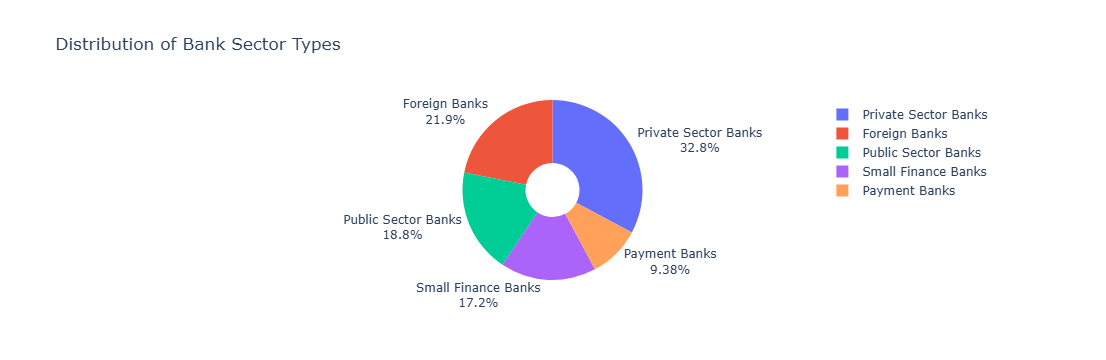

In [141]:
print("Number of Categories/Classes in column:", df_may["Bank Sector Type"].nunique())
print("Types:")
print(df_may["Bank Sector Type"].unique())
print(df_may["Bank Sector Type"].value_counts()) 
sector_counts = df_may["Bank Sector Type"].value_counts().reset_index()
sector_counts.columns = ['Bank Sector Type', 'Count']
fig = px.pie(sector_counts,names='Bank Sector Type',values='Count',title='Distribution of Bank Sector Types',hole = 0.3)
fig.update_traces(textinfo='percent+label')
fig.show()

__Numerical Columns :__
No Of ATMs', 'No Of PoS','No of Credit Cards', 'CC PT at PoS Volume','Cc PT at PoS value ( in CR)', 'CC PT Online (e-com) Volume',
'CC PT Online (e-com) Value (In CR)', 'CC PT Others Volume','CC PT Others Value (in Cr)', 'CC W at ATM Volume','CC W at ATM value ( in CR)'

__2. Disturbution of various numerical coumns__

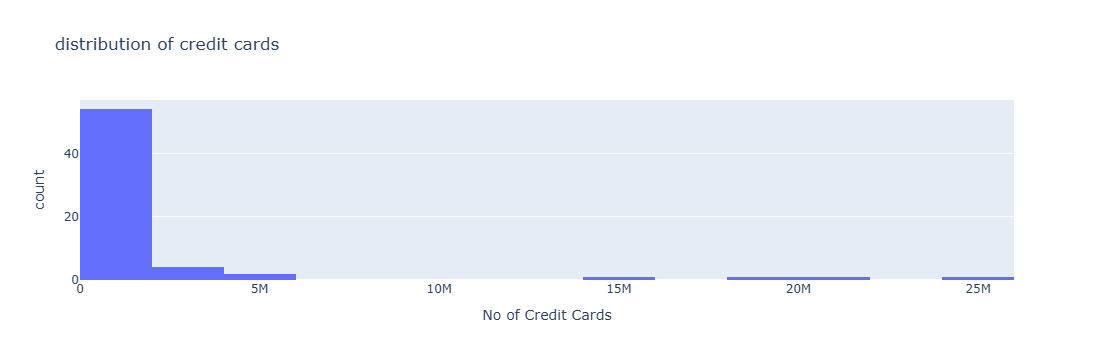

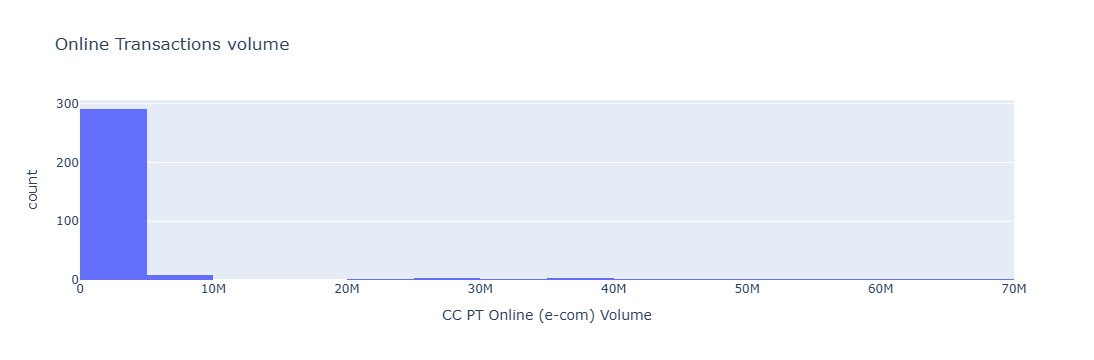

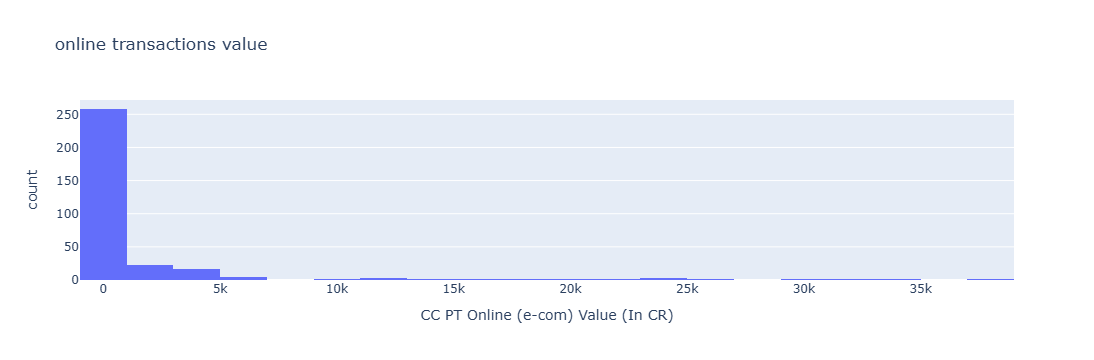

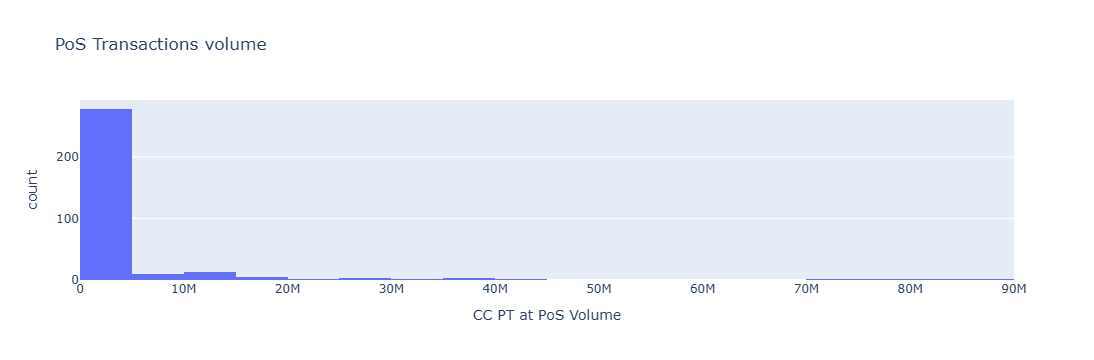

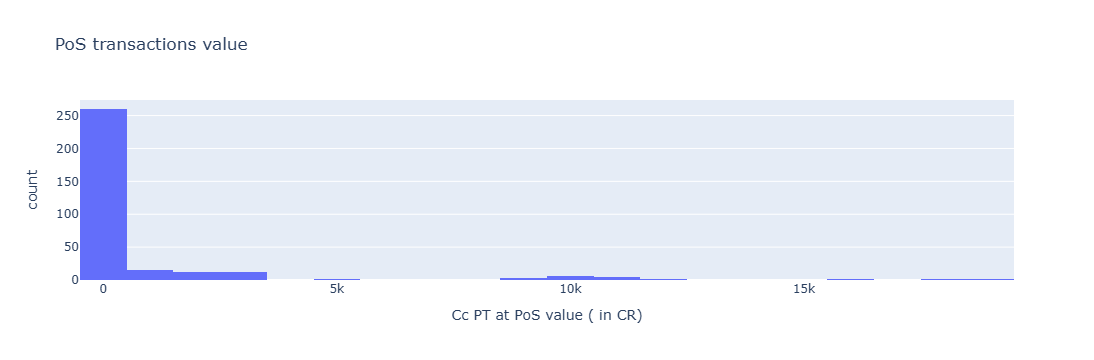

In [34]:
fig = px.histogram(df_may, x="No of Credit Cards",title = "distribution of credit cards")
fig.show()

fig1 = px.histogram(df, x = 'CC PT Online (e-com) Volume', title = "Online Transactions volume")
fig1.show()

fig2 = px.histogram(df, x =  'CC PT Online (e-com) Value (In CR)', title = "online transactions value")
fig2.show()

fig3 = px.histogram(df, x = "CC PT at PoS Volume", title = "PoS Transactions volume")
fig3.show()

fig4 = px.histogram(df, x = 'Cc PT at PoS value ( in CR)', title = "PoS transactions value")
fig4.show()

__Insights from univariate analysis__
- private sector banks are having majority among all the other sector banks with the percentage of 32.8% and the foriegn banks with 21.9%
- Most banks issued less than 5 Million credit cards  only few banks have issued over 15M to 25M 
- Only a small number of banks have issued more — these are likely top private sector banks or credit card–focused institutions
- Most of the banking institutes are having less than 5M transactions in online payment method and transaction value <5k Cr (including all the months)
- same for PoS transactions also maximum number of banks are having less than 5M transactions and transaction value < 3.5k Cr

 **2.2 Bi variate analysis** <a id='bi'>

[Back to TOC](#menu)

**In the Bi/Multi-Variate we have these variable combinations**

- Descriptive Stats Measures used to study data between two or more columns

**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**

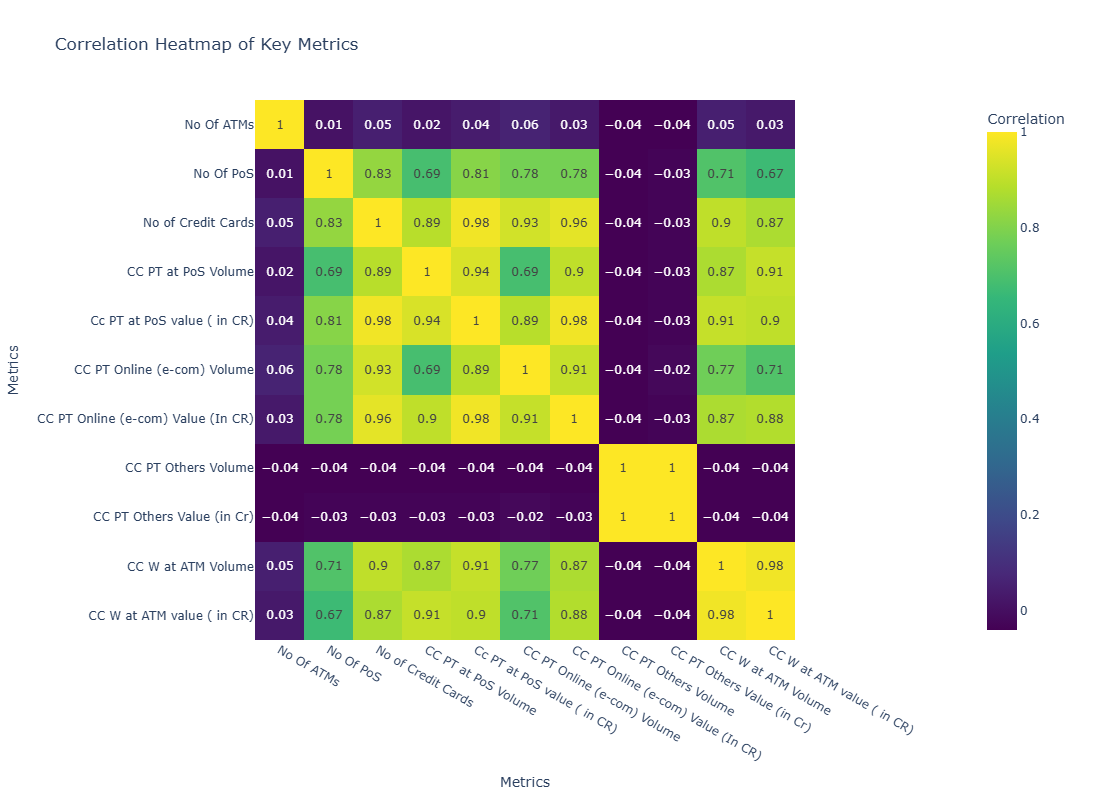

In [155]:
numeric_cols = df.select_dtypes(include='number').columns
correlation_matrix = round(df[numeric_cols].corr(),2)
fig = px.imshow(correlation_matrix,text_auto=True,color_continuous_scale='Viridis',labels=dict(x="Metrics", y="Metrics",
                 color="Correlation"),x=numeric_cols,y=numeric_cols,title="Correlation Heatmap of Key Metrics")
fig.update_layout(height=800, width=1000)
fig.show()

__Insights from the Heatmap__
- No of credit cards issued by bank have good correlation with payments volume and value of various methods
- as commonly known we can see great correlation between volume and value of each payment method

Bank Sector Type
foreign banks           14
payment banks            6
private sector banks    21
public sector banks     12
small finance banks     12
Name: Bank Name, dtype: int64


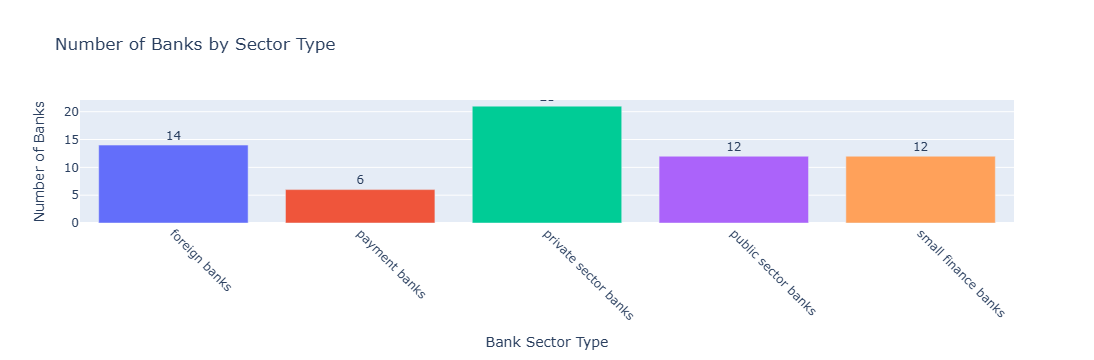

In [159]:
sector_counts = df.groupby("Bank Sector Type")["Bank Name"].nunique().reset_index()
sector_counts.rename(columns={"Bank Name": "Number of Banks"}, inplace=True)
print(df.groupby("Bank Sector Type")["Bank Name"].nunique())
fig = px.bar(sector_counts,x="Bank Sector Type",y="Number of Banks",text="Number of Banks",
             color="Bank Sector Type",title="Number of Banks by Sector Type")
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=45, showlegend=False, height=500)
fig.show()

__Insights from Categorical columns analysis__
- Private banks are having majority in numbers(21) among the all the other sectors
- foreign banks are second highest with 14 banks under that sector and then public sector banks with 12 banks

__Bi variate analysis__
__Categorical vs Numerical__

#######################################################
Taken Date Column: No Of ATMs
Bank Sector Type
Foreign Banks               94.0
Payment Banks           183830.0
Private Sector Banks     12843.0
Public Sector Banks      25816.0
Small Finance Banks        929.0
Name: No Of ATMs, dtype: float64
#######################################################


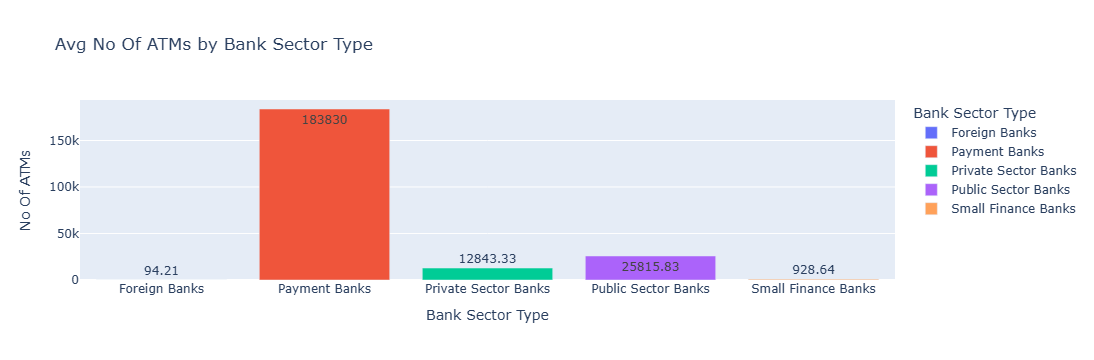

#######################################################
Taken Date Column: No Of PoS
Bank Sector Type
Foreign Banks             1100.0
Payment Banks                0.0
Private Sector Banks    461615.0
Public Sector Banks     156464.0
Small Finance Banks        228.0
Name: No Of PoS, dtype: float64
#######################################################


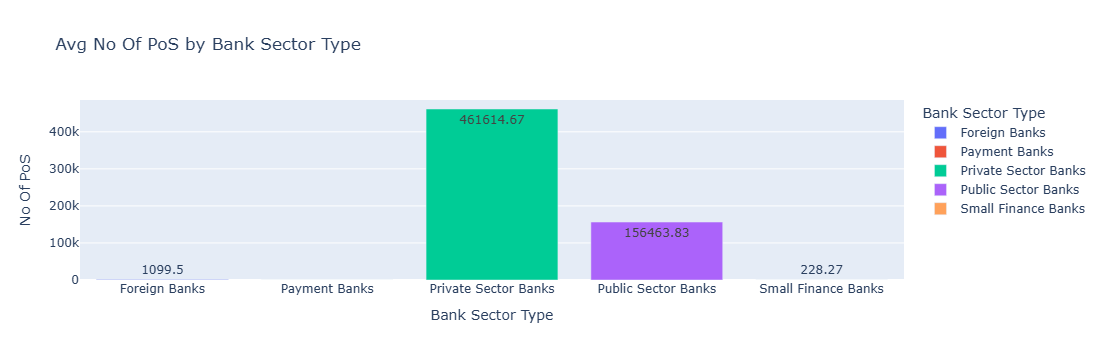

#######################################################
Taken Date Column: No of Credit Cards
Bank Sector Type
Foreign Banks            325478.0
Payment Banks                 0.0
Private Sector Banks    3755066.0
Public Sector Banks     2221770.0
Small Finance Banks      102118.0
Name: No of Credit Cards, dtype: float64
#######################################################


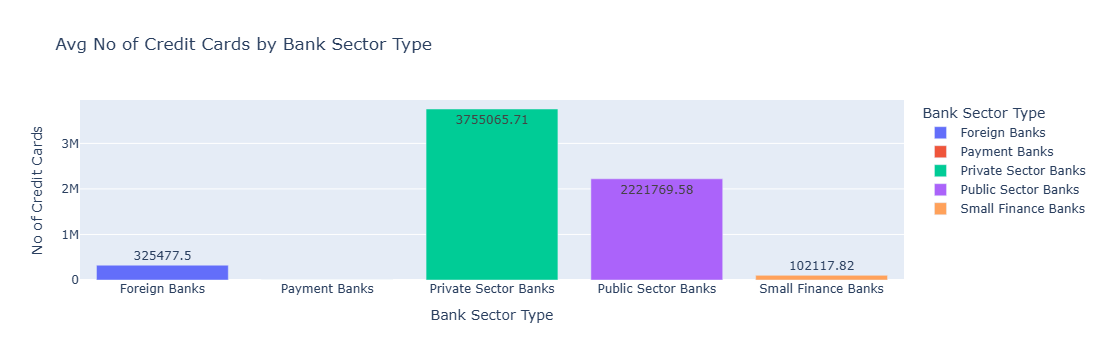

In [177]:
cols = ['No Of ATMs', 'No Of PoS',
       'No of Credit Cards']
for col in cols:
    grouped = round(df_may.groupby(["Bank Sector Type"])[col].mean().reset_index(),2)
    grouped = grouped.sort_values("Bank Sector Type")
    print("#######################################################")
    print("Taken Date Column:",col)
    print(round(df_may.groupby(["Bank Sector Type"])[col].mean()))
    print("#######################################################")
    fig = px.bar(grouped,x="Bank Sector Type",y=col,color = "Bank Sector Type",title=f"Avg {col} by Bank Sector Type", text = col)
    fig.show()

#######################################################
Taken Date Column: No Of ATMs
Bank Sector Type
Foreign Banks              1319
Payment Banks           1102980
Private Sector Banks     269710
Public Sector Banks      309790
Small Finance Banks       10215
Name: No Of ATMs, dtype: int64
#######################################################


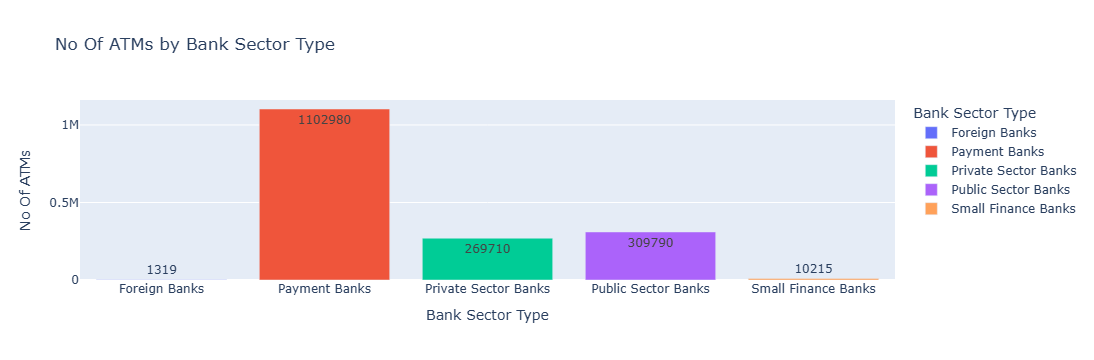

#######################################################
Taken Date Column: No Of PoS
Bank Sector Type
Foreign Banks             15393
Payment Banks                 0
Private Sector Banks    9693908
Public Sector Banks     1877566
Small Finance Banks        2511
Name: No Of PoS, dtype: int64
#######################################################


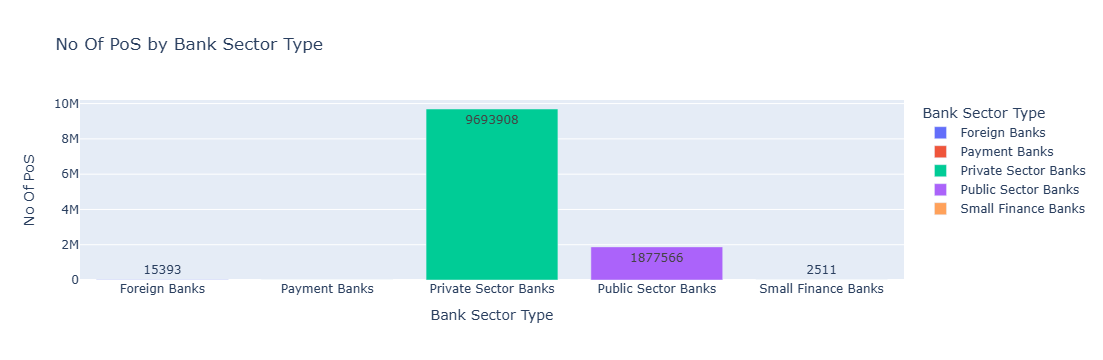

#######################################################
Taken Date Column: No of Credit Cards
Bank Sector Type
Foreign Banks            4556685
Payment Banks                  0
Private Sector Banks    78856380
Public Sector Banks     26661235
Small Finance Banks      1123296
Name: No of Credit Cards, dtype: int64
#######################################################


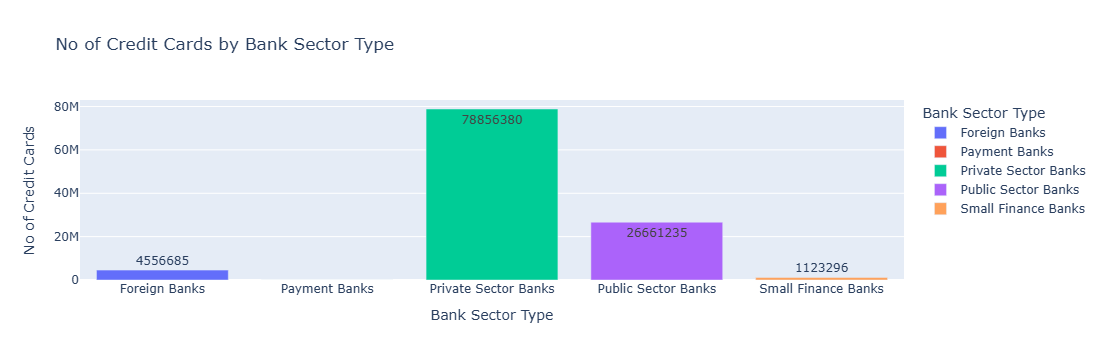

In [175]:
cols = ['No Of ATMs', 'No Of PoS','No of Credit Cards']
for col in cols:
    grouped = df_may.groupby(["Bank Sector Type"])[col].sum().reset_index()
    grouped = grouped.sort_values("Bank Sector Type")
    print("#######################################################")
    print("Taken Date Column:",col)
    print(df_may.groupby(["Bank Sector Type"])[col].sum())
    print("#######################################################")
    fig = px.bar(grouped,x="Bank Sector Type",y=col,color = "Bank Sector Type",title=f"{col} by Bank Sector Type",text = col)
    fig.show()

#######################################################
Taken Date Column: CC PT at PoS Volume
Bank Sector Type
foreign banks            21825824
payment banks                   0
private sector banks    909297608
public sector banks     176398999
small finance banks       4537726
Name: CC PT at PoS Volume, dtype: int64
#######################################################


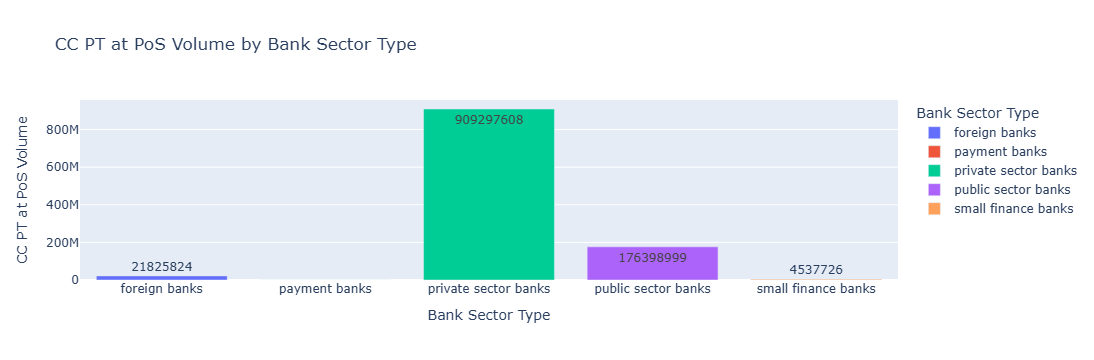

#######################################################
Taken Date Column: Cc PT at PoS value ( in CR)
Bank Sector Type
foreign banks            12384.538384
payment banks                0.000000
private sector banks    257323.560242
public sector banks      68538.659788
small finance banks       2287.275178
Name: Cc PT at PoS value ( in CR), dtype: float64
#######################################################


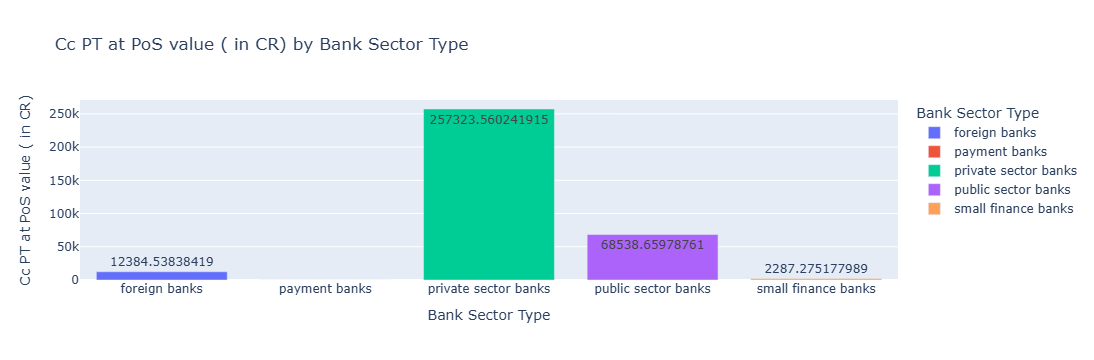

#######################################################
Taken Date Column: CC PT Online (e-com) Volume
Bank Sector Type
foreign banks            39291281
payment banks                   0
private sector banks    753473471
public sector banks     284817844
small finance banks      10482084
Name: CC PT Online (e-com) Volume, dtype: int64
#######################################################


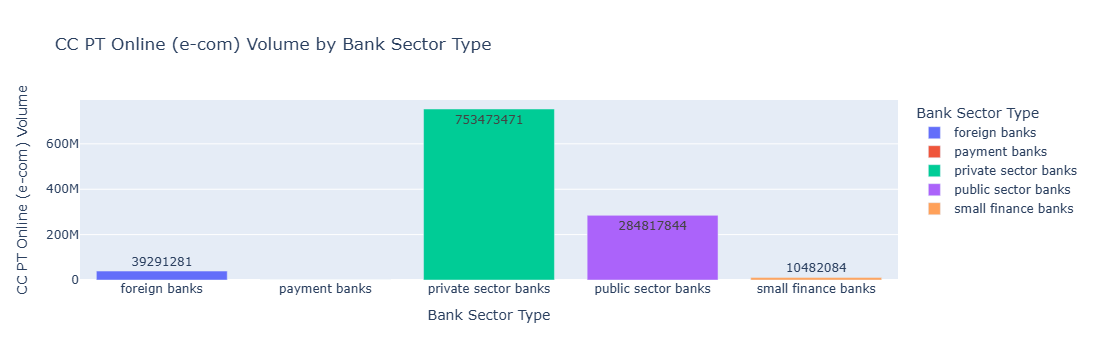

#######################################################
Taken Date Column: CC PT Online (e-com) Value (In CR)
Bank Sector Type
foreign banks            34757.239009
payment banks                0.000000
private sector banks    443028.630300
public sector banks     105996.454676
small finance banks       2506.983529
Name: CC PT Online (e-com) Value (In CR), dtype: float64
#######################################################


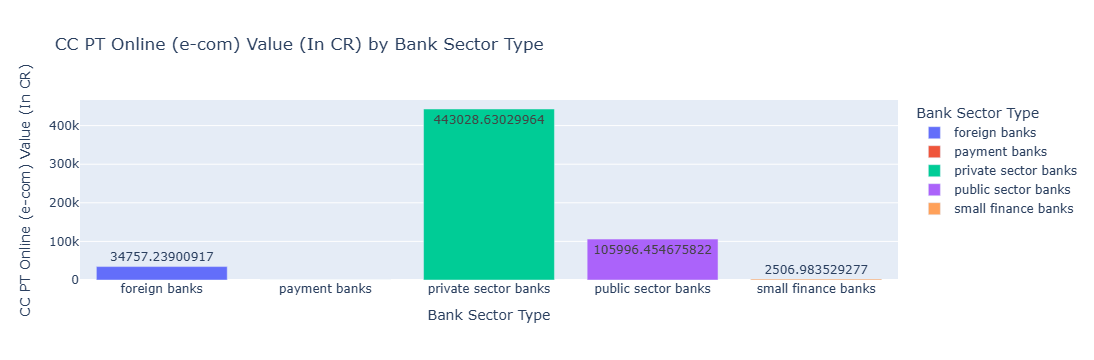

#######################################################
Taken Date Column: CC PT Others Volume
Bank Sector Type
foreign banks                 0
payment banks                 0
private sector banks        230
public sector banks           9
small finance banks     4020539
Name: CC PT Others Volume, dtype: int64
#######################################################


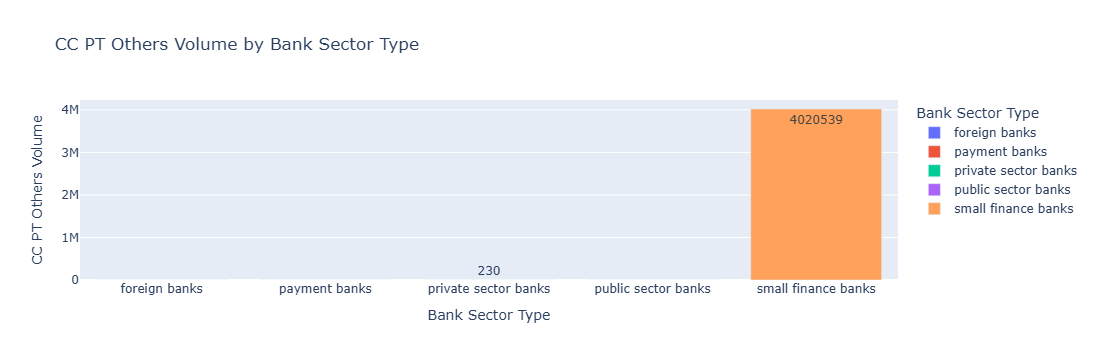

#######################################################
Taken Date Column: CC PT Others Value (in Cr)
Bank Sector Type
foreign banks            0.0000
payment banks            0.0000
private sector banks     1.8161
public sector banks      0.0423
small finance banks     71.8802
Name: CC PT Others Value (in Cr), dtype: float64
#######################################################


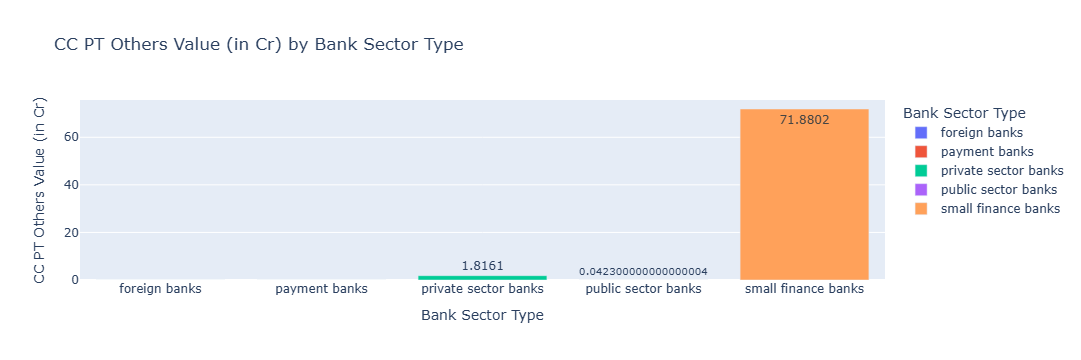

#######################################################
Taken Date Column: CC W at ATM Volume
Bank Sector Type
foreign banks             60077
payment banks                 0
private sector banks    2162246
public sector banks     1324799
small finance banks       16299
Name: CC W at ATM Volume, dtype: int64
#######################################################


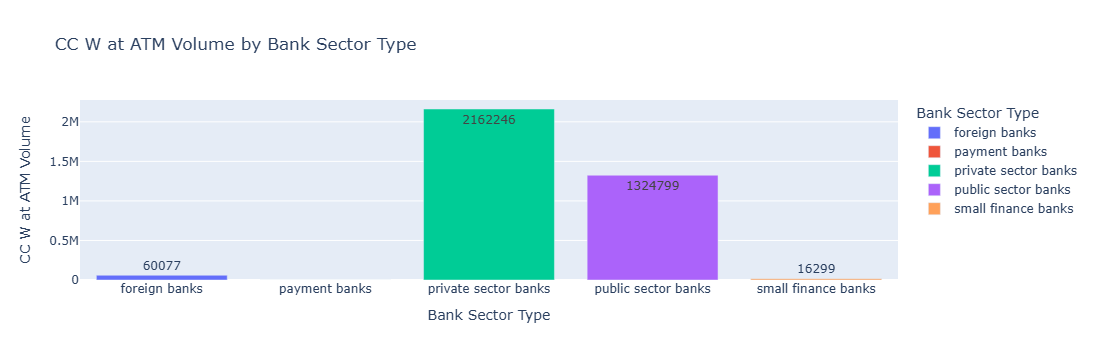

#######################################################
Taken Date Column: CC W at ATM value ( in CR)
Bank Sector Type
foreign banks             33.647137
payment banks              0.000000
private sector banks    1244.844655
public sector banks      648.384896
small finance banks        8.268260
Name: CC W at ATM value ( in CR), dtype: float64
#######################################################


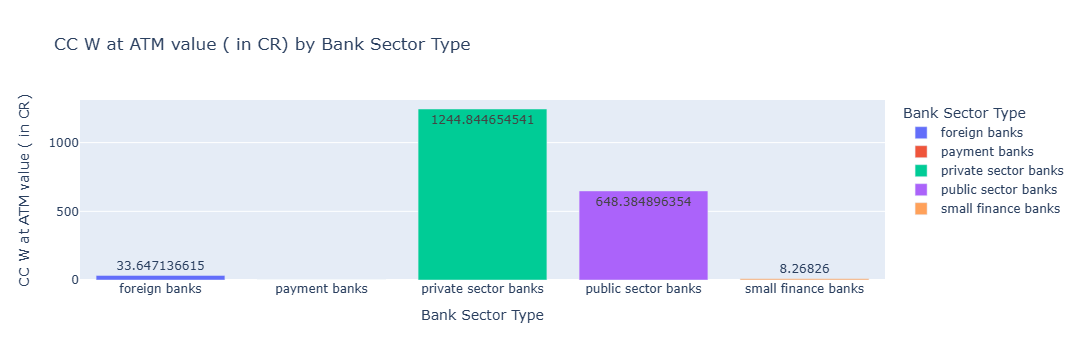

In [197]:
numeric_cols = ['CC PT at PoS Volume',
       'Cc PT at PoS value ( in CR)', 'CC PT Online (e-com) Volume',
       'CC PT Online (e-com) Value (In CR)', 'CC PT Others Volume',
       'CC PT Others Value (in Cr)', 'CC W at ATM Volume',
       'CC W at ATM value ( in CR)']
for col in numeric_cols:
    grouped = df.groupby(["Bank Sector Type"])[col].sum().reset_index()
    grouped = grouped.sort_values("Bank Sector Type")
    print("#######################################################")
    print("Taken Date Column:",col)
    print(df.groupby(["Bank Sector Type"])[col].sum())
    print("#######################################################")
    fig = px.bar(grouped,x="Bank Sector Type",y=col,color = "Bank Sector Type",title=f"{col} by Bank Sector Type",text = col)
    fig.show()

#######################################################
Bank Sector Type
Foreign Banks             61177182
Payment Banks                    0
Private Sector Banks    1664933555
Public Sector Banks      462541651
Small Finance Banks       19056648
Name: Total_Credit_card_transactions_volume, dtype: int64
#######################################################


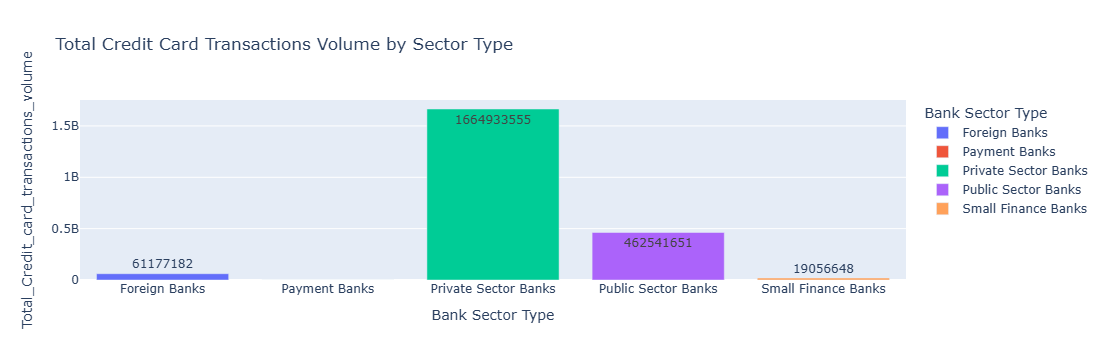

In [181]:
sector_counts = df1.groupby("Bank Sector Type", observed=True)["Total_Credit_card_transactions_volume"].sum().reset_index()
print("#######################################################")
print(df1.groupby("Bank Sector Type", observed=True)["Total_Credit_card_transactions_volume"].sum())
print("#######################################################")
fig = px.bar(sector_counts,x="Bank Sector Type",y="Total_Credit_card_transactions_volume",text="Total_Credit_card_transactions_volume",color="Bank Sector Type",
    title="Total Credit Card Transactions Volume by Sector Type")
fig.show()

#######################################################
Bank Sector Type
Foreign Banks            47175.424530
Payment Banks                0.000000
Private Sector Banks    701598.851296
Public Sector Banks     175183.541660
Small Finance Banks       4874.407167
Name: Total_Credit_card_transactions_value, dtype: float64
#######################################################


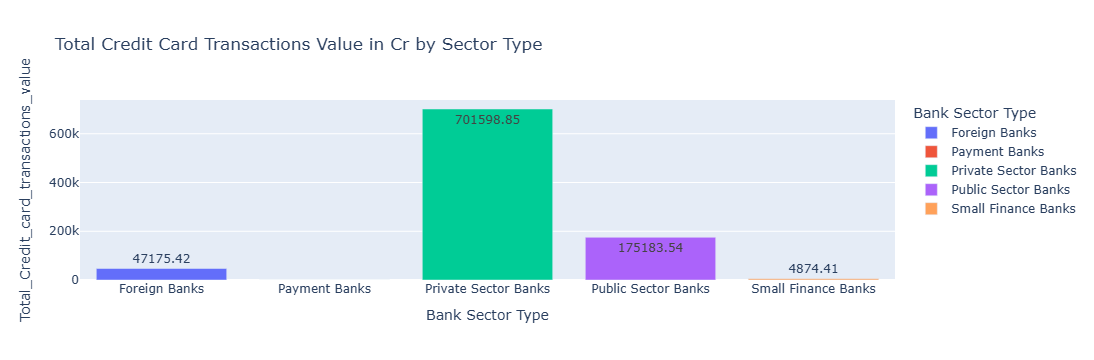

In [183]:
sector_counts =round( df1.groupby("Bank Sector Type", observed=True)["Total_Credit_card_transactions_value"].sum().reset_index(),2)
print("#######################################################")
print(df1.groupby("Bank Sector Type", observed=True)["Total_Credit_card_transactions_value"].sum())
print("#######################################################")
fig = px.bar(sector_counts,x="Bank Sector Type",y="Total_Credit_card_transactions_value",text="Total_Credit_card_transactions_value",color="Bank Sector Type",
    title="Total Credit Card Transactions Value in Cr by Sector Type")
fig.show()

__Insights From Sector Vise Comparison__
- all the numbers regarding ATMs, CRMs, PoS machines and Credit Card are taken into consideration from the month of the May(latest Month) and also all the values in INR
- Including micro ATMs, ATMs and CRMs payment banks are having Highest number of ATMs ≈ 1.1 Million
- In other hand private sector banks having high point of sales machines ≈9.69 M so that private sector banks are high point of sale transaction    volume(909.3M) and value(257.32k Cr)
  * Highest number of credit cards issued ≈78.85  Million  and also in due to High number of credit cards issued , private sector banks are high volume of transactions (753.47M) , with value of (443.02k Cr) and cash withdrawal at ATM with total volume of 2.16M transactions worth of ≈ 1224 Cr and in all these categories public sector banks are in second place
- Private sector banks credit cards are used for more transactions (166 Cr) with transactions worth of ≈ 701k Cr and public sector with total transactions of ≈46 Cr worth of ≈175k Cr
- Small finance(ex : paytm payments bank )banks credit cards are used for other transactions like mail order or tele orders with total volume of ≈4M worth of 72 Cr

#######################################################
Taken Date Column: No Of ATMs
Bank Name
FINO PAYMENTS BANK          455998
NSDL PAYMENTS BANK          301781
INDIA POST PAYMENTS BANK    194607
AIRTEL PAYMENTS BANK        150594
STATE BANK OF INDIA         114325
CITY UNION BANK LTD.         91763
YES BANK LTD                 85723
BANK OF BARODA               55583
BANK OF INDIA                31320
HDFC BANK LTD                23551
Name: No Of ATMs, dtype: int64
#######################################################


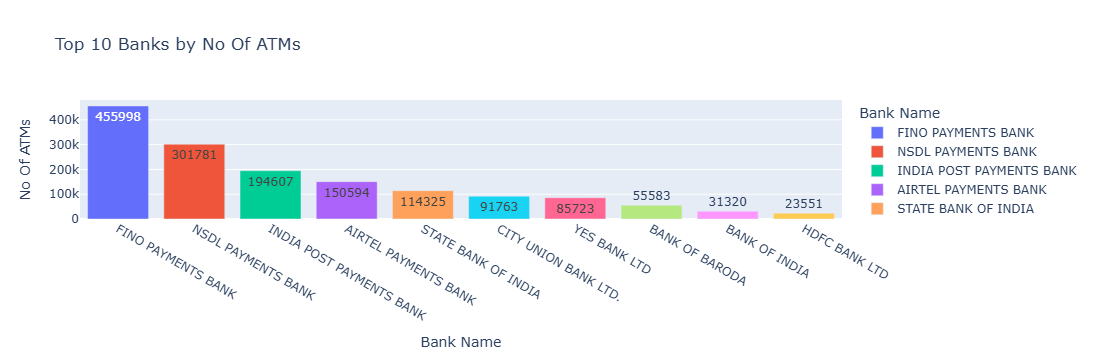

#######################################################
Taken Date Column: No Of PoS
Bank Name
RBL BANK LTD               2893565
AXIS BANK LTD              2285286
ICICI BANK LTD             2117869
HDFC BANK LTD              1811639
STATE BANK OF INDIA        1617832
INDUSIND BANK LTD           197311
YES BANK LTD                106262
CANARA BANK                  77302
KOTAK MAHINDRA BANK LTD      75074
BANDHAN BANK LTD             69209
Name: No Of PoS, dtype: int64
#######################################################


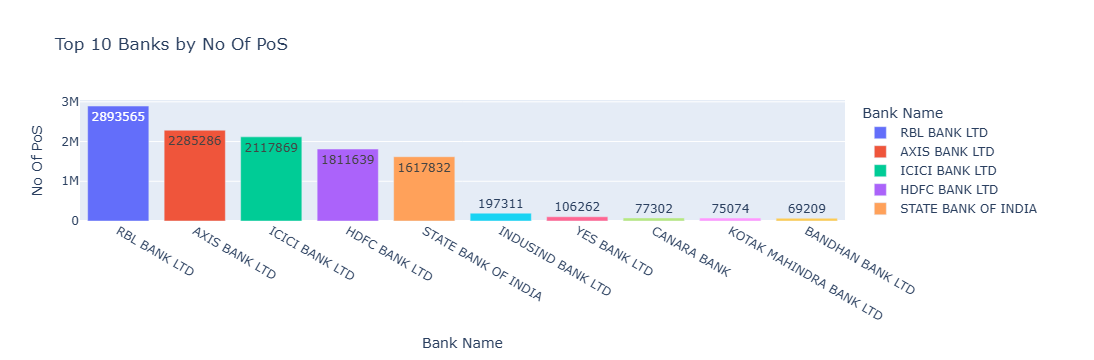

#######################################################
Taken Date Column: No of Credit Cards
Bank Name
HDFC BANK LTD              24276236
STATE BANK OF INDIA        21109673
ICICI BANK LTD             18268429
AXIS BANK LTD              15060789
KOTAK MAHINDRA BANK LTD     4866190
RBL BANK LTD                4735288
IDFC FIRST BANK LTD         3704375
INDUSIND BANK LTD           3189282
BANK OF BARODA              3017591
YES BANK LTD                2687571
Name: No of Credit Cards, dtype: int64
#######################################################


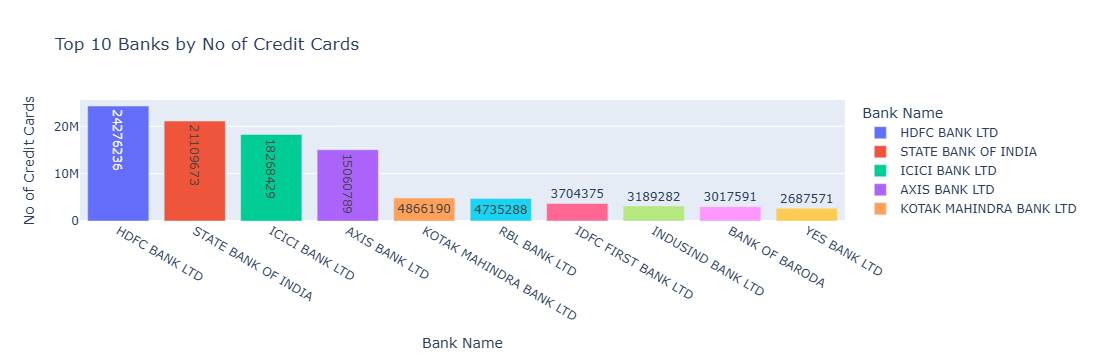

In [189]:
for col in cols:
    grouped = df_may.groupby("Bank Name", observed=True)[col].sum().reset_index()
    top10 = grouped.sort_values(by=col, ascending=False).head(10)
    print("#######################################################")
    print("Taken Date Column:",col)
    print( df_may.groupby("Bank Name", observed=True)[col].sum().nlargest(10))
    print("#######################################################")
    fig = px.bar(top10,x="Bank Name",y=col,title=f"Top 10 Banks by {col}",text=col,color="Bank Name")
    fig.show()

#######################################################
Taken Date Column: CC PT at PoS Volume
Bank Name
HDFC BANK LTD              86801025
AXIS BANK LTD              40166998
STATE BANK OF INDIA        26147540
ICICI BANK LTD             18504004
IDFC FIRST BANK LTD        12875859
KOTAK MAHINDRA BANK LTD    11836448
YES BANK LTD               10885712
BANK OF BARODA              7562173
RBL BANK LTD                4970659
INDUSIND BANK LTD           4233910
Name: CC PT at PoS Volume, dtype: int64
#######################################################


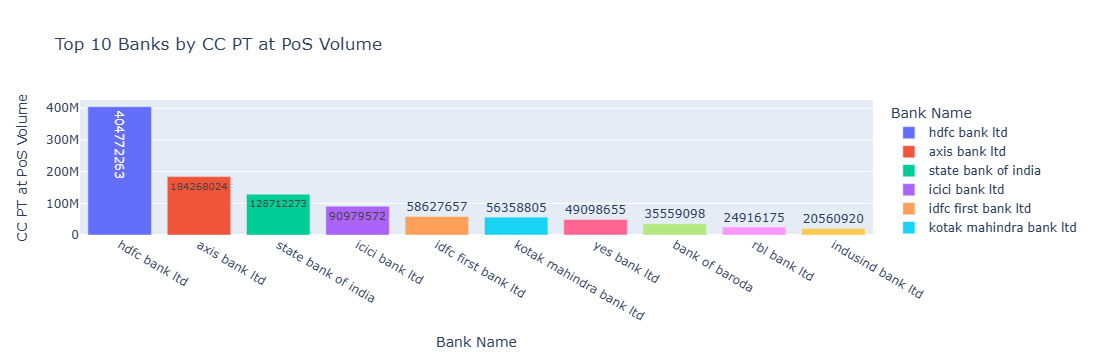

#######################################################
Taken Date Column: Cc PT at PoS value ( in CR)
Bank Name
HDFC BANK LTD              18961.463950
STATE BANK OF INDIA        11604.441730
AXIS BANK LTD               9976.343169
ICICI BANK LTD              9923.943966
INDUSIND BANK LTD           2999.057121
RBL BANK LTD                2752.574774
KOTAK MAHINDRA BANK LTD     2519.134353
IDFC FIRST BANK LTD         2203.880818
YES BANK LTD                1956.515520
BANK OF BARODA              1446.871486
Name: Cc PT at PoS value ( in CR), dtype: float64
#######################################################


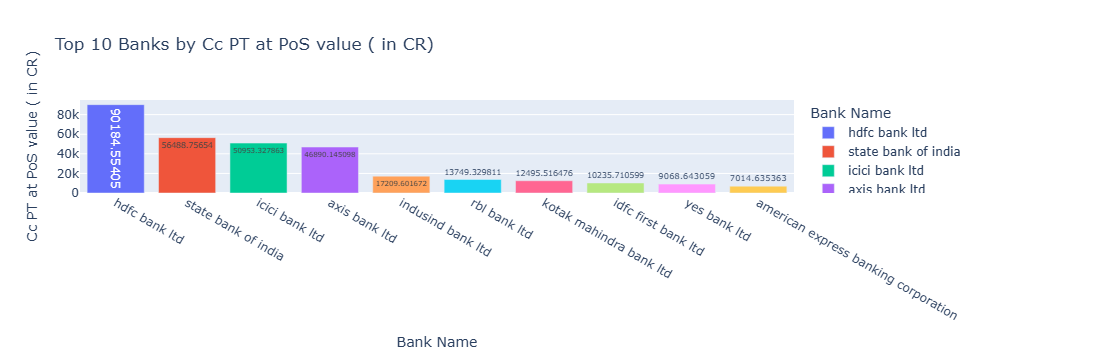

#######################################################
Taken Date Column: CC PT Online (e-com) Volume
Bank Name
ICICI BANK LTD                          65795922
STATE BANK OF INDIA                     56138701
HDFC BANK LTD                           37724554
AXIS BANK LTD                           27554013
INDUSIND BANK LTD                        9300065
RBL BANK LTD                             5631609
KOTAK MAHINDRA BANK LTD                  4305846
AMERICAN EXPRESS BANKING CORPORATION     4213087
BANK OF BARODA                           3292432
IDFC FIRST BANK LTD                      2573138
Name: CC PT Online (e-com) Volume, dtype: int64
#######################################################


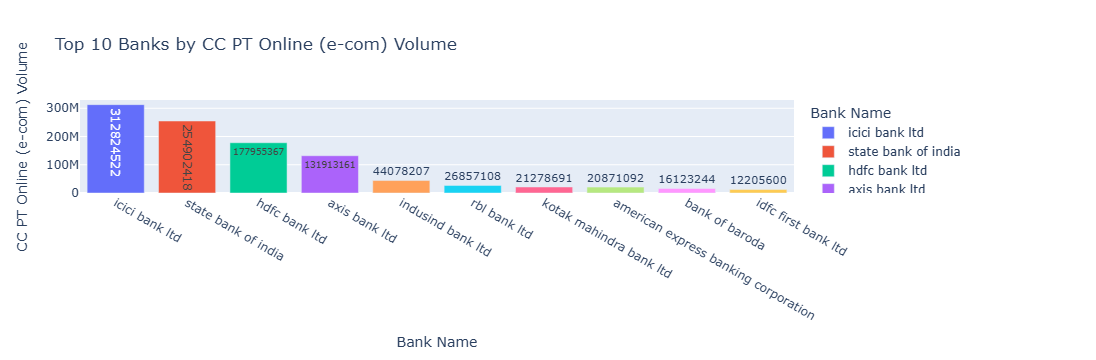

#######################################################
Taken Date Column: CC PT Online (e-com) Value (In CR)
Bank Name
HDFC BANK LTD                           32785.738000
ICICI BANK LTD                          24591.027940
STATE BANK OF INDIA                     20784.799710
AXIS BANK LTD                           12478.391420
INDUSIND BANK LTD                        6083.584947
RBL BANK LTD                             4678.812208
AMERICAN EXPRESS BANKING CORPORATION     4041.980774
KOTAK MAHINDRA BANK LTD                  3788.824231
IDFC FIRST BANK LTD                      1790.599835
BANK OF BARODA                           1703.810606
Name: CC PT Online (e-com) Value (In CR), dtype: float64
#######################################################


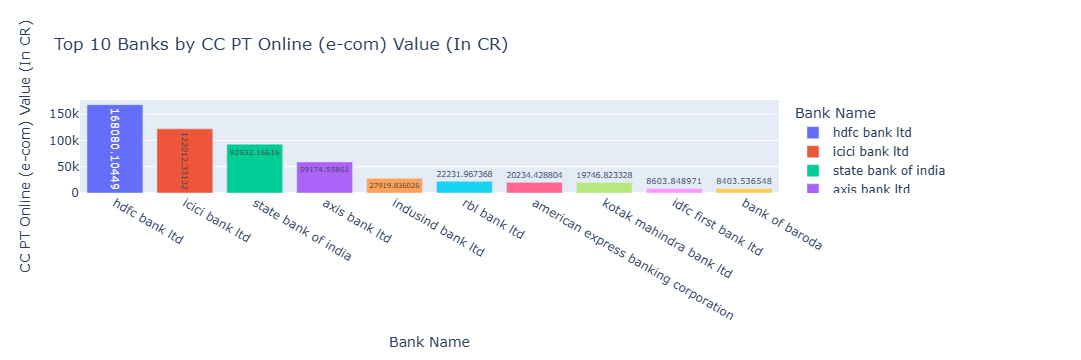

#######################################################
Taken Date Column: CC PT Others Volume
Bank Name
UTKARSH SMALL FINANCE BANK LTD          1033321
AU SMALL FINANCE BANK LTD                   309
ICICI BANK LTD                               41
PUNJAB NATIONAL BANK                          2
AIRTEL PAYMENTS BANK                          0
AMERICAN EXPRESS BANKING CORPORATION          0
AXIS BANK LTD                                 0
BANDHAN BANK LTD                              0
BANK OF AMERICA                               0
BANK OF BAHRAIN & KUWAIT B.S.C.               0
Name: CC PT Others Volume, dtype: int64
#######################################################


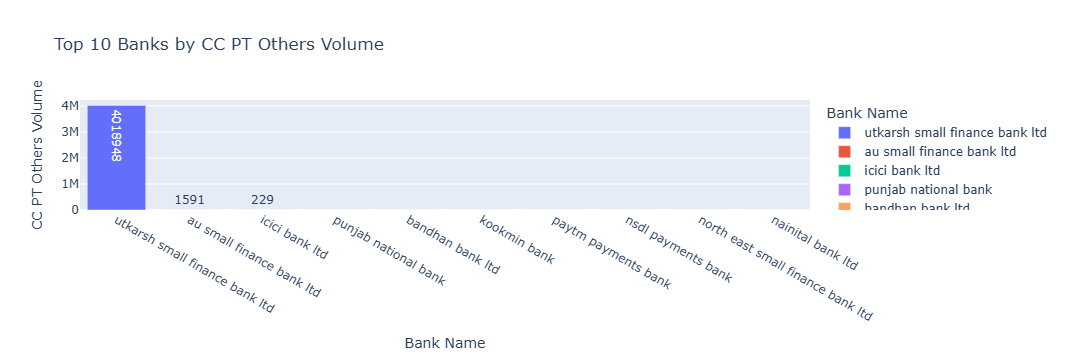

#######################################################
Taken Date Column: CC PT Others Value (in Cr)
Bank Name
UTKARSH SMALL FINANCE BANK LTD          18.6231
ICICI BANK LTD                           0.3054
AU SMALL FINANCE BANK LTD                0.0145
PUNJAB NATIONAL BANK                     0.0102
AIRTEL PAYMENTS BANK                     0.0000
AMERICAN EXPRESS BANKING CORPORATION     0.0000
AXIS BANK LTD                            0.0000
BANDHAN BANK LTD                         0.0000
BANK OF AMERICA                          0.0000
BANK OF BAHRAIN & KUWAIT B.S.C.          0.0000
Name: CC PT Others Value (in Cr), dtype: float64
#######################################################


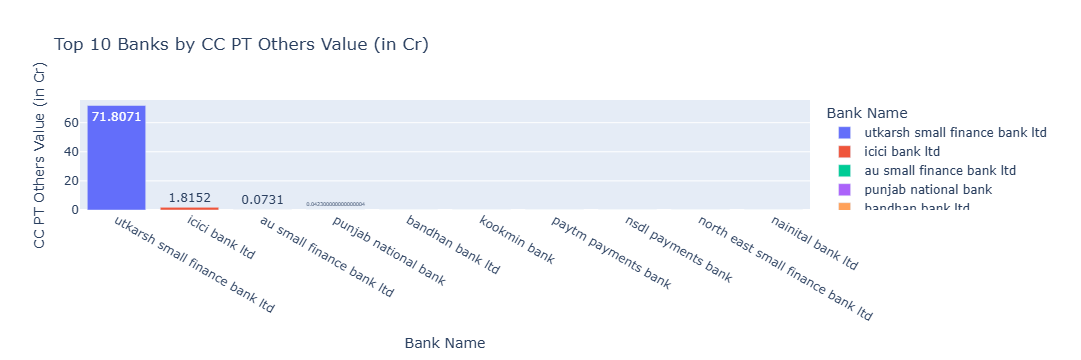

#######################################################
Taken Date Column: CC W at ATM Volume
Bank Name
HDFC BANK LTD                 161317
STATE BANK OF INDIA           128994
CANARA BANK                    83384
AXIS BANK LTD                  72042
ICICI BANK LTD                 55083
RBL BANK LTD                   24913
INDUSIND BANK LTD              22763
IDFC FIRST BANK LTD            22336
KOTAK MAHINDRA BANK LTD        21828
JAMMU AND KASHMIR BANK LTD     10344
Name: CC W at ATM Volume, dtype: int64
#######################################################


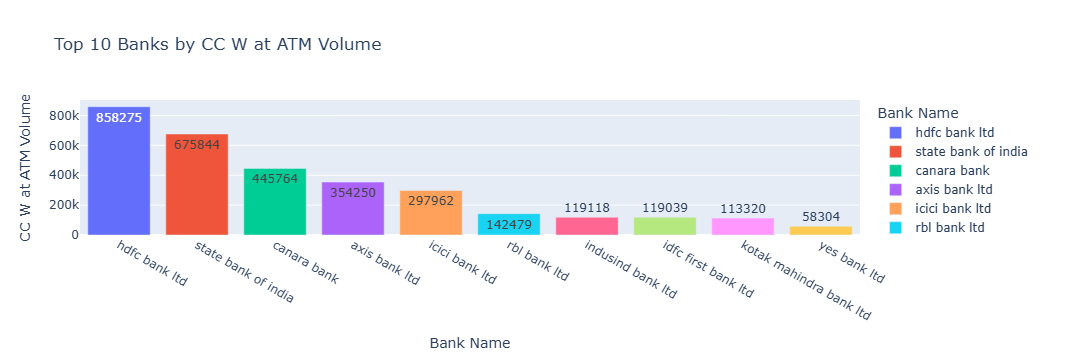

#######################################################
Taken Date Column: CC W at ATM value ( in CR)
Bank Name
HDFC BANK LTD                 109.957539
STATE BANK OF INDIA            57.170443
CANARA BANK                    47.987480
AXIS BANK LTD                  39.874660
ICICI BANK LTD                 29.096735
INDUSIND BANK LTD              12.541157
IDFC FIRST BANK LTD            11.470890
RBL BANK LTD                   11.367100
KOTAK MAHINDRA BANK LTD        11.200627
JAMMU AND KASHMIR BANK LTD      4.771542
Name: CC W at ATM value ( in CR), dtype: float64
#######################################################


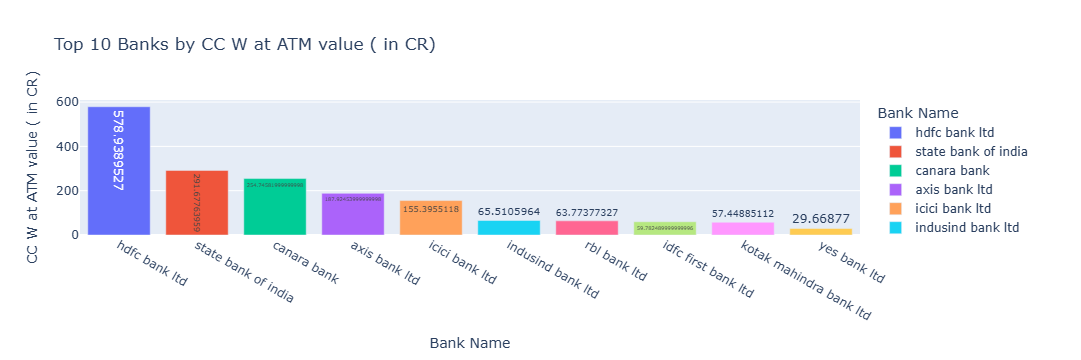

In [191]:
for col in numeric_cols:
    grouped = df.groupby("Bank Name", observed=True)[col].sum().reset_index()
    top10 = grouped.sort_values(by=col, ascending=False).head(10)
    print("#######################################################")
    print("Taken Date Column:",col)
    print( df_may.groupby("Bank Name", observed=True)[col].sum().nlargest(10))
    print("#######################################################")
    fig = px.bar(top10,x="Bank Name",y=col,title=f"Top 10 Banks by {col}",text=col,color="Bank Name")
    fig.show()

__Insights From Top 10 Banks Comparison__
- From the above bar charts We can see that due to micro ATMs, Fino  payments bank having highest number of ATMs (455998) , and in regular Count of ATMs State Bank of India having Highest number of ATMs with the count of 114325
- As we already discussed private sector banks dominance in pos machines , RBL Bank LTD is having highest machines with count of ≈29 M
- And HDFC Bank issued around 24M credit cards(after adjusting the number of cards withdrawan/cancelled) , which makes HDFC Bank Top in issuing credit cards, and then SBI is in second with 21 M credit cards
- Because of highest number of credit cards, HDFC Bank is having high number of pos transactions with volume of ≈400 M worth of 90k Cr, and cash withdrawal at ATMs , total transactions of around 858k worth of 579 Cr
- Even though people are using ICICI Bank credit cards for making online transactions(total transactions made by ICICI Bank credit cards are around 312M), HDFC credit cards are used for making high value payments that is why  we can see that HDFC bank(total transactions made is around 168k Cr is in top in online transactions, and then ICICI with 122k Cr)

__Line Charts__

Month
January     431351538
February    397643545
March       459393614
April       450956719
May         468363620
Name: Total_Credit_card_transactions_volume, dtype: int64


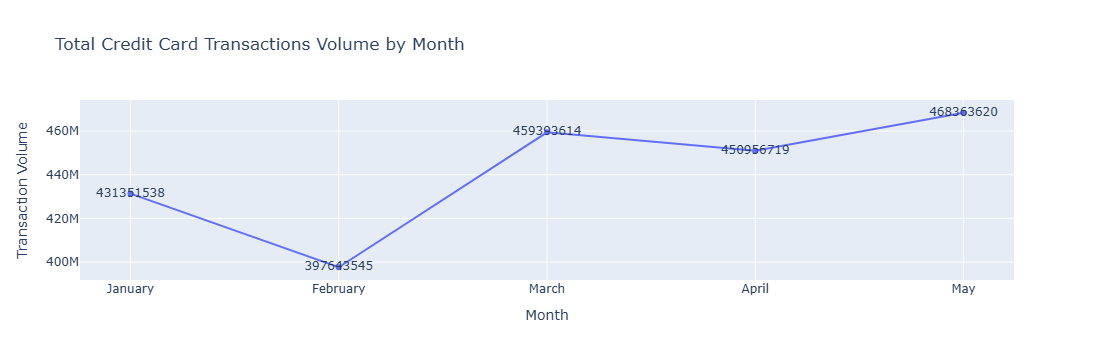

In [223]:
month_order = ['January', 'February', 'March', 'April', 'May']
df1['Month'] = pd.Categorical(df1['Month'], categories=month_order, ordered=True)
sector_counts = df1.groupby("Month", observed=True)["Total_Credit_card_transactions_volume"].sum().reset_index()
print(df1.groupby("Month", observed=True)["Total_Credit_card_transactions_volume"].sum())
fig = px.line(sector_counts, x="Month",y="Total_Credit_card_transactions_volume",text="Total_Credit_card_transactions_volume",
              title="Total Credit Card Transactions Volume by Month",markers=True,line_shape="linear")
fig.update_layout(xaxis_title="Month",yaxis_title="Transaction Volume",showlegend=False)
fig.show()

Month
January     184538.56
February    167577.73
March       201904.04
April       184610.13
May         190201.77
Name: Total_Credit_card_transactions_value, dtype: float64


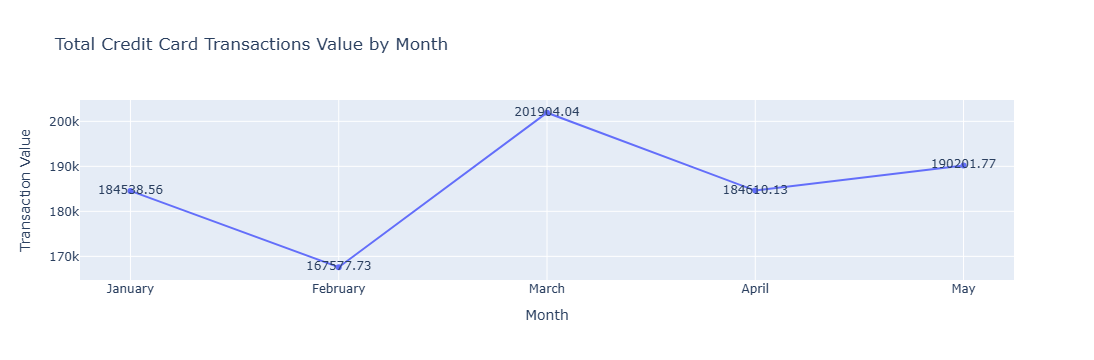

In [221]:
sector_counts = round(df1.groupby("Month", observed=True)["Total_Credit_card_transactions_value"].sum().reset_index(),2)
print(round(df1.groupby("Month", observed=True)["Total_Credit_card_transactions_value"].sum(),2))
fig = px.line(sector_counts, x="Month",y="Total_Credit_card_transactions_value",text="Total_Credit_card_transactions_value",
              title="Total Credit Card Transactions Value by Month",markers=True,line_shape="linear")
fig.update_layout(xaxis_title="Month",yaxis_title="Transaction Value",showlegend=False)
fig.show()

__Insights From Line Charts__
- In 2025 up to may Credit card payment at PoS increased gradually but  in February it went from 220m to 199m then after it increased to 235 M payments in May, even though transaction volume is more in May,people spent more money in March(71.5k Cr)
- Same in online purchases also transactions volume went to peaks in May (230M transactions) But value of transactions are high in March (130k Cr)
- The growth of payments for other type of transactions are rapidly increased from January to may , it went from 635k transactions to 1M transactions and from 11 Cr to 19 Cr
- In all the other cases of transactions using credit cards, we can observe the line gradually increased but in the case of cash withdrawal using credit cards it gradually decreased
- So from the above all the analysis we can say that the total transactions made by credit card went it's lowest point in February (39 Cr transactions worth of 167k Cr) And it went to it's peak in March with (45Cr transactions worth of 201k Cr)

 **2.3 Multivariate Analysis** <a id='multi'>

[Back to TOC](#menu)

__Sunburst Plots__

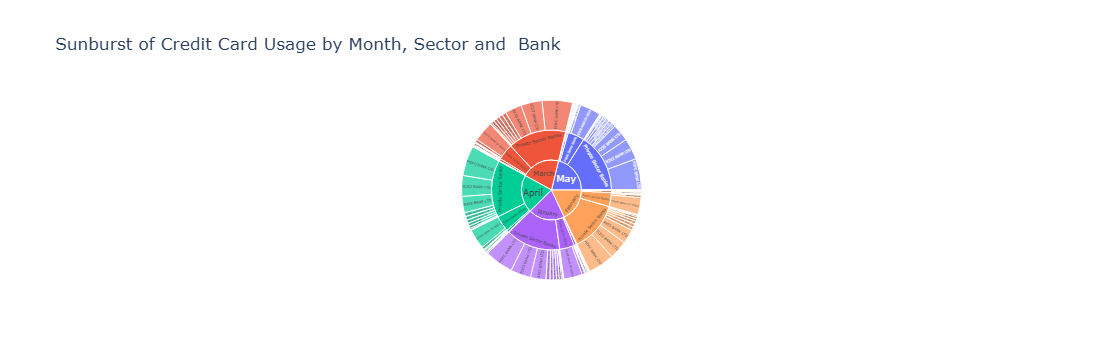

In [19]:
hierarchy_cols = ["Month", "Bank Sector Type","Bank Name"]
value_col = "Total_Credit_card_transactions_volume"
fig = px.sunburst(df1,path=hierarchy_cols,values=value_col,title="Sunburst of Credit Card Usage by Month, Sector and  Bank")
fig.update_layout(height = 500)
fig.show()

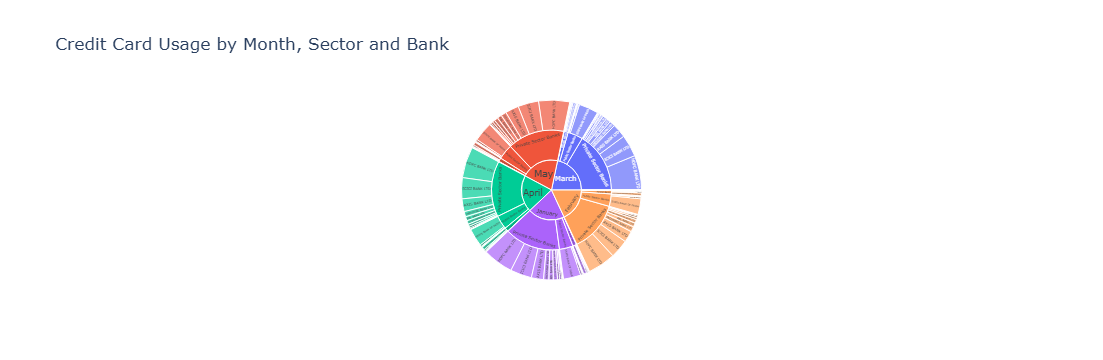

In [21]:
hierarchy_cols = ["Month", "Bank Sector Type","Bank Name"]
value_col = "Total_Credit_card_transactions_value"
fig = px.sunburst(df1,path=hierarchy_cols,values=value_col,title="Credit Card Usage by Month, Sector and Bank")
fig.update_layout(height = 500)
fig.show()

__Insights From Sunburst__
- Among the given months
     * Highest Volume of transactions - May ≈ 47 Cr
     * Highest Transaction Value - March ≈ 201k Cr
- january Stats
     * Private Sector Dominated with Highest Number Of Transactions ≈ 326k
     * Private Sector Banks dominated with total transactions value of  ≈ 139k Cr
          * In Private Sector Banks HDFC Bank Dominated Other banks with Highest Number of transactions ≈ 114k
          * HDFC Bank Dominated  other banks with total transactions value of ≈ 50k Cr
     * Public Sector Banks are in second with respect to volume of transactions(≈89.5K)
     * Public Sector Banks are in second with Transaction Value of ≈ 34k Cr
          * SBI(≈74K) is the Most Dominated bank among all the other public sector banks
          * SBI Is the Dominated with total transactions value of ≈ 29k Cr
- February Stats
     * Private Sector Dominated with Highest Number Of Transactions ≈ 300k
     * Private Sector Banks dominated with total transactions value of  ≈ 126k Cr
          * HDFC Bank Dominated Other banks with Highest Number of transactions ≈ 104k
          * HDFC Bank Dominated  other banks with total transactions value of ≈ 46.5k Cr
     * Publuc Sector Banks are in second with respect to volume of transactions(≈83K)
     * Public Sector Banks are in second with Transaction Value of ≈ 31k Cr
          * SBI(≈68.5K) is the Most Dominated bank among all the other public sector banks
          * SBI Is the Dominated with total transactions value of ≈ 26k Cr
- March Stats
     * Private Sector Dominated with Highest Number Of Transactions ≈ 346k
     * Private Sector Banks dominated with total transactions value of  ≈ 153k Cr
          * HDFC Bank Dominated Other banks with Highest Number of transactions ≈ 121k
          * HDFC Bank Dominated  other banks with total transactions value of ≈ 58k Cr
     * Publuc Sector Banks are in second with respect to volume of transactions(≈96K)
     * Public Sector Banks are in second with Transaction Value of ≈ 38k Cr
          * SBI(≈80K) is the Most Dominated bank among all the other public sector banks
          * SBI Is the Dominated with total transactions value of ≈ 32.5k Cr
- April Stats
     * Private Sector Dominated with Highest Number Of Transactions ≈ 339k
     * Private Sector Banks dominated with total transactions value of  ≈ 140k Cr
          * HDFC Bank Dominated Other banks with Highest Number of transactions ≈ 119k
          * HDFC Bank Dominated  other banks with total transactions value of ≈ 52k Cr
     * Publuc Sector Banks are in second with respect to volume of transactions(≈95K)
     * Public Sector Banks are in second with Transaction Value of ≈ 34.5k Cr
          * SBI(≈79K) is the Most Dominated bank among all the other public sector banks
          * SBI Is the Dominated with total transactions value of ≈ 29.5k Cr
- May Stats
     * Private Sector Dominated with Highest Number Of Transactions ≈ 353k
     * Private Sector Banks dominated with total transactions value of  ≈ 142k Cr
          * HDFC Bank Dominated Other banks with Highest Number of transactions ≈ 124k
          * HDFC Bank Dominated other banks with total transactions value of ≈ 52k Cr
     * Publuc Sector Banks are in second with respect to volume of transactions(≈98.5K)
     * Public Sector Banks are in second with Transaction Value of ≈ 37.5k Cr
          * SBI(≈82.5K) is the Most Dominated bank among all the other public sector banks
          * SBI Is the Dominated with total transactions value of ≈ 32.5k Cr

### 3. Conclusion <a id='conclusion'>

[Back to TOC](#menu)

- Most Of The Banks Belongs To Private Sector-32.8% (21)
- HDFC Bank Issued Highest Number of credit cards ≈ 25M
- RBL Bank LTD is having Highest Number Of PoS machines ≈ 2.9M
- Private Sector Banks are playing a mojor role in all methods of transactions(Total Volume Of Transactions ≈1.6B,Total Value Of Transactions ≈701.5k Cr)
- Payment Banks are having most number of Micro ATMs ≈1.1 M
- SBI is Having Highest Number Of ATMs(Excluding Micro ATMs) = 114325
- Until May 2025 most of the transactions made in the month of May with the volume of ≈ 46.8 Cr
- And Most of the transactions by value made in march worth of 201k Cr
- As of stats until May 2025, people have reduced withdrawing the money from ATMs using Credit Card
- Most of the banks Customers are using their credit cards to shop online (in march 2025 total online transaction value ≈ 130k)